# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Arthur Matos
- Brian Pina
- Gabriel Sabanai
- Guilherme Marques
- Luiz Henrique Zamprogno
- Luiz Pettengill
- Matheus Blanco
- Pedro Féo
- Saleh Kader
- Victor Buendia


### LIBRARIES

In [20]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint

### GRAPH SETTINGS

In [22]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [24]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

In [26]:
repos = [
    'Eccoar_Complaint',
    'eccoar_frontend',
    'Eccoar_Gateway',
    'Eccoar_Mailer',
    'Eccoar_Reports',
    'Eccoar_Users'
]

language = [['Eccoar_Complaint', 'ts'], 
            ['eccoar_frontend', 'ts'], 
            ['Eccoar_Gateway', 'ts'], 
            ['Eccoar_Mailer', 'ts'], 
            ['Eccoar_Reports', 'ts'], 
            ['Eccoar_Users', 'ts']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [28]:
repos_language

{'Eccoar_Complaint': 'ts',
 'eccoar_frontend': 'ts',
 'Eccoar_Gateway': 'ts',
 'Eccoar_Mailer': 'ts',
 'Eccoar_Reports': 'ts',
 'Eccoar_Users': 'ts'}

##### Path to the folder with all your jsons

In [30]:
jsons = glob('**/*.json') # add the path here
jsons

['complaints/fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-03-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-05-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-10-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-12-04-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-17-04-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-17-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-21-04-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-23-03-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-27-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-08-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-10-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-12-04-2021-00:00.json',
 '

In [32]:
issues = glob('issues.json')
sprints = glob('sprints.json')

In [34]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj


def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:
        base_component = read_json(i)
        base_component_data = base_component['baseComponent']['measures']
        base_component_df = pd.DataFrame(base_component_data)
        base_component_df['filename'] = os.path.basename(i)
        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    df['repository'] = aux_df[1]
    df['version'] = aux_df[2]
    df = df.sort_values(by=['repository', 'version'])
    return df

In [36]:
all_issues = read_json(issues[0])

In [38]:
all_sprints = read_json(sprints[0])

#### Create base component dataframe

In [40]:
base_component_df = create_base_component_df(jsons)

In [42]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
0,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
1,functions,42,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
2,test_execution_time,70,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
3,security_rating,1.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
4,tests,21,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
5,files,19,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
6,complexity,60,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
7,ncloc,626,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
8,coverage,68.2,False,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
9,reliability_rating,1.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00


#### Create dataframe per file

In [44]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [46]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [48]:
file_component_df = create_file_df(jsons)

In [50]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
0,src/migration/1618526567509-CreateComplaint.ts,2,2,0.0,0.0,0.0,76,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
1,src/migration/1618529825437-CreateVote.ts,2,2,0.0,0.0,0.0,38,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
2,src/utils/Category.ts,0,0,0.0,0.0,100.0,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
3,src/entity/Complaint.ts,0,0,0.0,0.0,100.0,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
4,src/repositories/ComplaintRepository.ts,7,7,0.0,0.0,61.3,80,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
5,src/utils/ComplaintUpvote.ts,1,3,0.0,0.0,63.6,16,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
6,src/utils/ComplaintVote.ts,0,0,0.0,0.0,NaN,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
7,src/utils/ComplaintVoteConfirmed.ts,1,3,0.0,0.0,92.3,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
8,src/utils/ComplaintWithVote.ts,0,0,0.0,0.0,NaN,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
9,src/controllers/ControllerComplaint.ts,13,24,0.0,0.0,90.3,170,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00


In [52]:
file_component_df['version'] = pd.to_datetime(file_component_df['version'], format="%d-%m-%Y-%H:%M")

In [54]:
file_component_df.to_excel('data/data.xlsx', index = False)

In [56]:
file_component_df.repository.unique()

array(['Eccoar_Complaint', 'Eccoar_Gateway', 'Eccoar_Mailer',
       'Eccoar_Reports', 'Eccoar_Users', 'eccoar_frontend'], dtype=object)

#### Create dataframe per repository

In [58]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [60]:
eccoar_complaint_df = file_component_df[file_component_df['repository'] == 'Eccoar_Complaint']
eccoar_gateway_df = file_component_df[file_component_df['repository'] == 'Eccoar_Gateway']
eccoar_frontend_df = file_component_df[file_component_df['repository'] == 'eccoar_frontend']
eccoar_reports_df = file_component_df[file_component_df['repository'] == 'Eccoar_Reports']
eccoar_mailer_df = file_component_df[file_component_df['repository'] == 'Eccoar_Mailer']
eccoar_users_df = file_component_df[file_component_df['repository'] == 'Eccoar_Users']
...

Ellipsis

In [62]:
repository_dataframes["Eccoar_Complaint"].head()

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
0,src/migration/1618526567509-CreateComplaint.ts,2,2,0.0,0.0,0.0,76,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
1,src/migration/1618529825437-CreateVote.ts,2,2,0.0,0.0,0.0,38,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
2,src/utils/Category.ts,0,0,0.0,0.0,100.0,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
3,src/entity/Complaint.ts,0,0,0.0,0.0,100.0,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
4,src/repositories/ComplaintRepository.ts,7,7,0.0,0.0,61.3,80,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01


### Metric calculations

##### COMPLEXITY

In [64]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [66]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [68]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### NCLOC

In [70]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

##### PRODUCTIVITY

#### RESOLVED ISSUES' THROUGHPUT

In [72]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

#### ISSUE TYPE IN A TIMEFRAME

In [74]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [76]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }
    
    soma = 0
    
    for i in issue_densities:
        soma += issue_densities[i][0]
    
    issue_density = soma/12.0
    
    return issue_density
    

#### BUGS RATIO

In [78]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [ ]:
TAGS = {
    'HOTFIX': 15,
    'DOCS': 121,
    'FEATURE': 32,
    'ARQ': 15,
    'DEVOPS': 12,
    'ANALYTICS': 23,
    'US': 19,
    'EASY': 28,
    'MEDIUM': 22,
    'HARD': 7,
    'EPS': 61,
    'MDS': 41
}
NUMBER_OF_ISSUES_RESOLVED=201
NUMBER_OF_ISSUES=236

In [47]:
df = pd.read_csv('result.csv')

In [49]:
m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES)

85.17

In [51]:
m8(TAGS, NUMBER_OF_ISSUES)

13.983333333333333

In [53]:
m9(TAGS, NUMBER_OF_ISSUES)

86.02

### Calculate m1, m2, m3, m7, m8, m9 for each repository

In [55]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    ncloc_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        ncloc_list.append(_ncloc(version_df))
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list
                              })
    
    metrics_df.to_csv('result.csv')
        
    return metrics_df

In [57]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [59]:
def create_df(base_issue_data):
    base_issue_m7 = []
    base_issue_m9 = []
    sprint_list = []
    start_list = []
    end_list = []
    
    for issue in base_issue_data:
        base_issue_m7.append(m7(base_issue_data[issue]['CLOSED_ISSUES'], NUMBER_OF_ISSUES))
        base_issue_m9.append(m9(base_issue_data[issue]['TAGS'], NUMBER_OF_ISSUES))
        sprint_list.append(int(issue.split(" ")[1]))
        start_list.append(all_sprints[issue]['start'])
        end_list.append(all_sprints[issue]['end'])
    df = pd.DataFrame({
                       'm7': base_issue_m7, 
                       'm9': base_issue_m9, 
                       'sprints': sprint_list,
                       'start_sprint': start_list,
                       'end_sprint': end_list
                    })
    metrics_df.to_csv('fga-eps-mds-2020-2-Eccoar-qualidade-total-processo.csv')
    
    return df

In [102]:
issue_df = create_df(all_issues)
issue_df['start_sprint'] = pd.to_datetime(issue_df['start_sprint'], format='%d/%m/%Y')
issue_df['end_sprint'] = pd.to_datetime(issue_df['end_sprint'], format='%d/%m/%Y')
issue_df

,m7,m9,sprints,start_sprint,end_sprint
0,0.85,0.42,0,2021-02-02,2021-02-08
1,7.63,5.08,1,2021-02-09,2021-02-15
2,5.51,3.81,2,2021-02-16,2021-02-22
3,7.20,6.78,3,2021-02-23,2021-03-01
4,7.20,7.63,4,2021-03-02,2021-03-08
5,8.05,5.51,5,2021-03-09,2021-03-15
6,6.36,6.36,6,2021-03-16,2021-03-22
7,4.66,3.39,7,2021-03-23,2021-03-29
8,3.81,2.97,8,2021-03-30,2021-04-05
9,7.63,6.36,9,2021-04-06,2021-04-12


In [103]:
eccoar_gateway_metrics = create_metrics_df(eccoar_gateway_df)
eccoar_complaint_metrics = create_metrics_df(eccoar_complaint_df)
eccoar_frontend_metrics = create_metrics_df(eccoar_frontend_df)
eccoar_mailer_metrics = create_metrics_df(eccoar_mailer_df)
eccoar_reports_metrics = create_metrics_df(eccoar_reports_df)
eccoar_users_metrics = create_metrics_df(eccoar_users_df)
file_component_metrics = create_metrics_df(file_component_df)

In [104]:
eccoar_gateway_metrics

,m1,m2,m3,repository,version,ncloc
0,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-01,305
1,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-03,305
2,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-05,321
3,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-10,338
4,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-12,256
5,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-17,256
6,0.909091,0.0,1.0,Eccoar_Gateway,2021-05-17,494
7,1.000000,0.0,1.0,Eccoar_Gateway,2021-03-23,110
8,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-23,267
9,0.875000,0.0,1.0,Eccoar_Gateway,2021-04-28,305


In [105]:
def add_m7_and_m9(metrics_df):

    m7_list = []
    m9_list = []

    for _, release in metrics_df.iterrows():

        curr_version = release['version']

        for _, row in issue_df.iterrows():
            if pd.Timestamp.to_numpy(row['start_sprint']) <= curr_version <= pd.Timestamp.to_numpy(row['end_sprint']):
                m7_list.append(row['m7'])
                m9_list.append(row['m9'])

    m7_list = pd.DataFrame(m7_list, columns=['m7'])
    m9_list = pd.DataFrame(m9_list, columns=['m9'])

    metrics_df = pd.concat([metrics_df, m7_list], axis=1)
    metrics_df = pd.concat([metrics_df, m9_list], axis=1)

    return metrics_df

In [112]:
eccoar_gateway_metrics = add_m7_and_m9(eccoar_gateway_metrics)
eccoar_complaint_metrics = add_m7_and_m9(eccoar_complaint_metrics)
eccoar_frontend_metrics = add_m7_and_m9(eccoar_frontend_metrics)
eccoar_mailer_metrics = add_m7_and_m9(eccoar_mailer_metrics)
eccoar_reports_metrics = add_m7_and_m9(eccoar_reports_metrics)
eccoar_users_metrics = add_m7_and_m9(eccoar_users_metrics)
file_component_metrics = add_m7_and_m9(file_component_metrics)

In [107]:
def calculate_ac(df):
    df['asc1'] = (df['m1'] + df['m2'] + df['m3']) / 3
    df['ac1'] = df['asc1']
    df['totalAC1'] = df['asc1']
    return df
print(df)

                                           path functions complexity  \
682                    src/utils/CheckFields.ts         2          3   
683           src/controllers/ControllerUser.ts         3          4   
684                   src/utils/ErrorHandler.ts         3          6   
685                           src/firebaseDB.ts         0          0   
686                               src/routes.ts         2          2   
687                               src/server.ts         1          2   
688                         src/schemas/User.ts         0          0   
689                     src/schemas/UserAuth.ts         0          0   
690                 src/services/UserService.ts         2          2   
691                    src/utils/CheckFields.ts         2          3   
692           src/controllers/ControllerUser.ts         5          6   
693                   src/utils/ErrorHandler.ts         3          8   
694                           src/firebaseDB.ts         0       

In [108]:
def calculate_ac2(issue_df):
    aux_df = pd.DataFrame({
        "asc2": [],
        "totalAC2": []
    })
    aux_df['asc2'] = (issue_df['m7'] + issue_df['m9']) / 2
    aux_df['totalAC2'] = aux_df['asc2']
    return pd.concat([issue_df, aux_df], 1)

issue_df_v2 = calculate_ac2(issue_df)
issue_df_v2

,m7,m9,sprints,start_sprint,end_sprint,asc2,totalAC2
0,0.85,0.42,0,2021-02-02,2021-02-08,0.635,0.635
1,7.63,5.08,1,2021-02-09,2021-02-15,6.355,6.355
2,5.51,3.81,2,2021-02-16,2021-02-22,4.660,4.660
3,7.20,6.78,3,2021-02-23,2021-03-01,6.990,6.990
4,7.20,7.63,4,2021-03-02,2021-03-08,7.415,7.415
5,8.05,5.51,5,2021-03-09,2021-03-15,6.780,6.780
6,6.36,6.36,6,2021-03-16,2021-03-22,6.360,6.360
7,4.66,3.39,7,2021-03-23,2021-03-29,4.025,4.025
8,3.81,2.97,8,2021-03-30,2021-04-05,3.390,3.390
9,7.63,6.36,9,2021-04-06,2021-04-12,6.995,6.995


In [113]:
eccoar_gateway_metrics = calculate_ac(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac(eccoar_users_metrics)
file_component_metrics = calculate_ac(file_component_metrics)

In [114]:
eccoar_gateway_metrics

,m1,m2,m3,repository,version,ncloc,asc1,ac1,totalAC1,m7,m9
0,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-01,305,0.625000,0.625000,0.625000,5.08,4.66
1,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-03,305,0.625000,0.625000,0.625000,5.08,4.66
2,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-05,321,0.625000,0.625000,0.625000,5.93,6.78
3,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-10,338,0.625000,0.625000,0.625000,5.93,6.78
4,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-12,256,0.666667,0.666667,0.666667,7.63,6.36
5,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-17,256,0.666667,0.666667,0.666667,5.93,8.05
6,0.909091,0.0,1.0,Eccoar_Gateway,2021-05-17,494,0.636364,0.636364,0.636364,5.51,5.93
7,1.000000,0.0,1.0,Eccoar_Gateway,2021-03-23,110,0.666667,0.666667,0.666667,4.66,3.39
8,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-23,267,0.666667,0.666667,0.666667,4.66,5.08
9,0.875000,0.0,1.0,Eccoar_Gateway,2021-04-28,305,0.625000,0.625000,0.625000,5.08,4.66


In [115]:
eccoar_gateway_metrics = calculate_ac2(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac2(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac2(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac2(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac2(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac2(eccoar_users_metrics)
file_component_metrics = calculate_ac2(file_component_metrics)

In [116]:
def plot_linear_regression(df):
    sns.regplot(x=df["totalAC1"], y=df["totalAC2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.show()

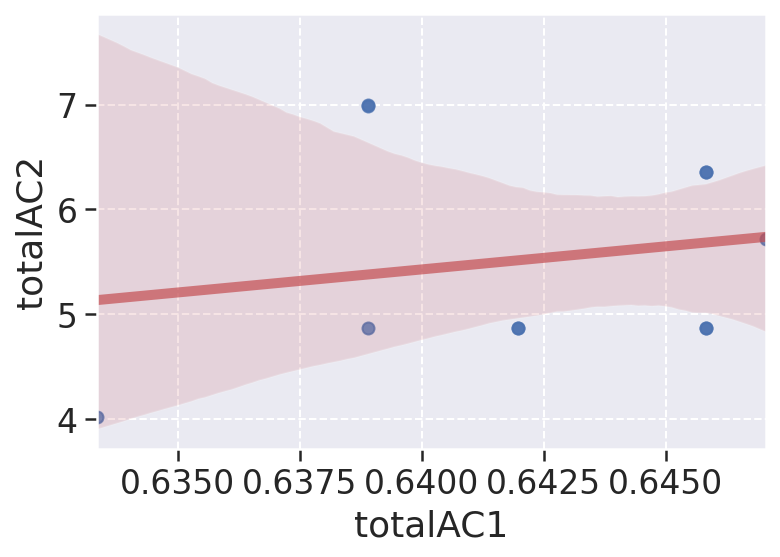

In [117]:
plot_linear_regression(eccoar_frontend_metrics)

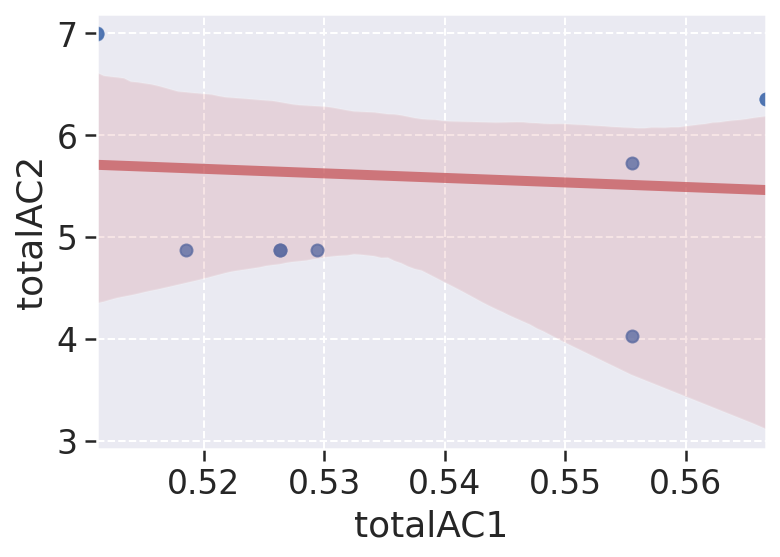

In [118]:
plot_linear_regression(eccoar_complaint_metrics)

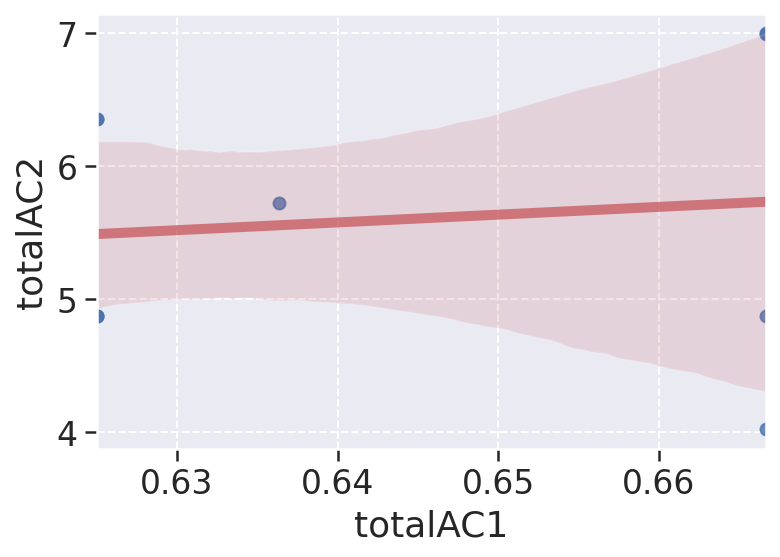

In [120]:
plot_linear_regression(eccoar_gateway_metrics)

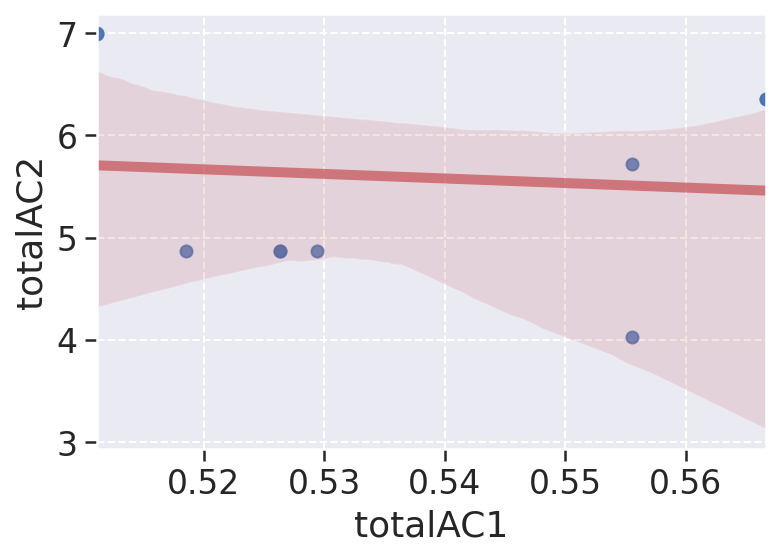

In [121]:
plot_linear_regression(eccoar_complaint_metrics)

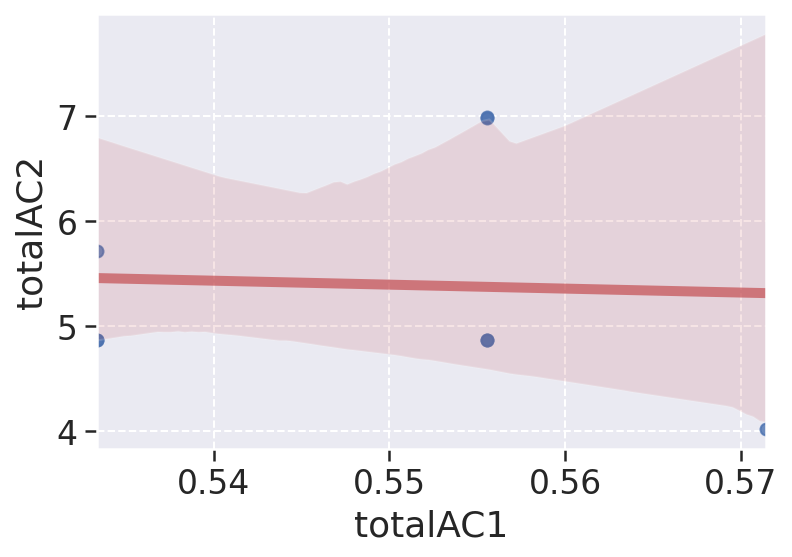

In [122]:
plot_linear_regression(eccoar_mailer_metrics)

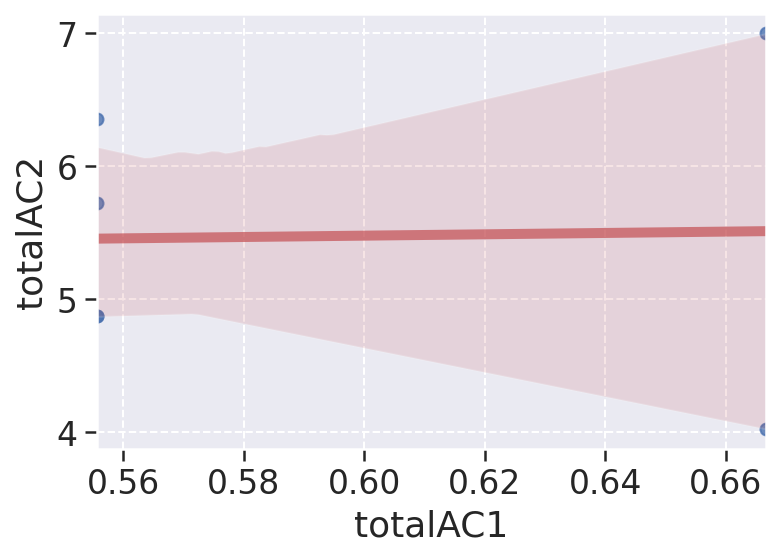

In [123]:
plot_linear_regression(eccoar_users_metrics)

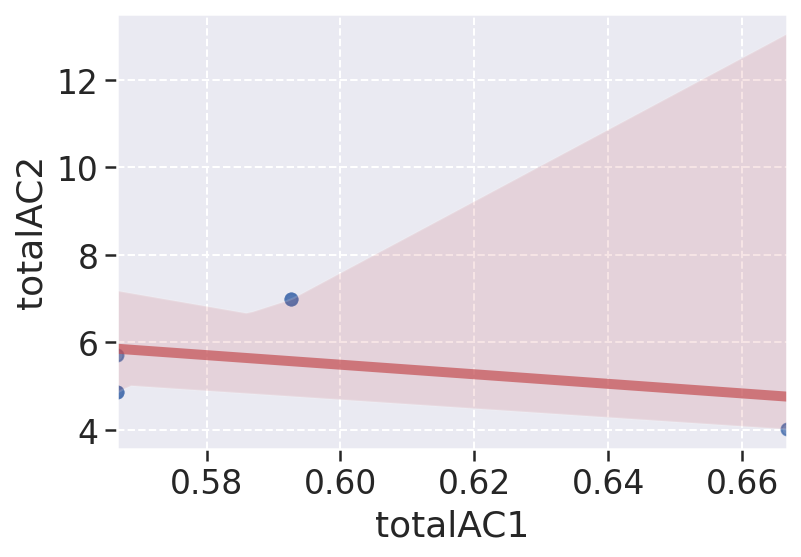

In [124]:
plot_linear_regression(eccoar_reports_metrics)

# Descriptive Statistic Analysis

- Realizes the calculation of statistic data such as mean, median, mode, min, max, standard deviation and variance.

In [125]:
def descriptive_statistics(df):
    
    metrics = df.describe()
    variance = df.var()
    variance_df = pd.DataFrame(variance, columns=["var"])
    variance_df = variance_df.T
    return metrics.append(variance_df).T

In [126]:
descriptive_statistics(eccoar_complaint_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,10.0,0.610169,0.066453,0.533333,0.561404,0.583591,0.666667,0.700000,0.004416
m2,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m3,10.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
ncloc,10.0,577.100000,189.824158,163.000000,479.500000,606.500000,689.750000,832.000000,36033.211111
asc1,10.0,0.536723,0.022151,0.511111,0.520468,0.527864,0.555556,0.566667,0.000491
ac1,10.0,0.536723,0.022151,0.511111,0.520468,0.527864,0.555556,0.566667,0.000491
totalAC1,10.0,0.536723,0.022151,0.511111,0.520468,0.527864,0.555556,0.566667,0.000491
m7,10.0,5.549000,0.882427,4.660000,5.080000,5.295000,5.930000,7.630000,0.778677
m9,10.0,5.635000,1.385113,3.390000,4.660000,5.505000,6.675000,8.050000,1.918539
asc2,10.0,5.592000,1.035168,4.025000,4.870000,5.295000,6.355000,6.995000,1.071573


In [127]:
descriptive_statistics(eccoar_gateway_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,10.0,0.928409,0.062483,0.875,0.875,0.892045,1.000000,1.000000,0.003904
m2,10.0,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
m3,10.0,1.000000,0.000000,1.000,1.000,1.000000,1.000000,1.000000,0.000000
ncloc,10.0,295.700000,94.558683,110.000,258.750,305.000000,317.000000,494.000000,8941.344444
asc1,10.0,0.642803,0.020828,0.625,0.625,0.630682,0.666667,0.666667,0.000434
ac1,10.0,0.642803,0.020828,0.625,0.625,0.630682,0.666667,0.666667,0.000434
totalAC1,10.0,0.642803,0.020828,0.625,0.625,0.630682,0.666667,0.666667,0.000434
m7,10.0,5.549000,0.882427,4.660,5.080,5.295000,5.930000,7.630000,0.778677
m9,10.0,5.635000,1.385113,3.390,4.660,5.505000,6.675000,8.050000,1.918539
asc2,10.0,5.592000,1.035168,4.025,4.870,5.295000,6.355000,6.995000,1.071573


In [128]:
descriptive_statistics(eccoar_frontend_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,11.0,0.889958,0.019513,0.850000,0.875000,0.888889,0.906250,0.911765,0.000381
m2,11.0,0.036681,0.006504,0.029412,0.031250,0.037037,0.041667,0.050000,0.000042
m3,11.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
ncloc,11.0,1369.909091,382.058491,657.000000,1100.000000,1280.000000,1618.000000,1996.000000,145968.690909
asc1,11.0,0.642213,0.004336,0.633333,0.638889,0.641975,0.645833,0.647059,0.000019
ac1,11.0,0.642213,0.004336,0.633333,0.638889,0.641975,0.645833,0.647059,0.000019
totalAC1,11.0,0.642213,0.004336,0.633333,0.638889,0.641975,0.645833,0.647059,0.000019
m7,11.0,5.430000,0.906256,4.660000,4.660000,5.080000,5.930000,7.630000,0.821300
m9,11.0,5.622727,1.301177,3.390000,4.870000,5.080000,6.570000,8.050000,1.693062
asc2,11.0,5.526364,1.005885,4.025000,4.870000,4.870000,6.355000,6.995000,1.011805


In [129]:
descriptive_statistics(eccoar_reports_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,6.0,0.775926,0.116198,0.700000,0.700000,0.738889,0.777778,1.000000,0.013502
m2,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m3,6.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
ncloc,6.0,197.333333,83.653253,28.000000,218.000000,229.000000,240.000000,240.000000,6997.866667
asc1,6.0,0.591975,0.038733,0.566667,0.566667,0.579630,0.592593,0.666667,0.001500
ac1,6.0,0.591975,0.038733,0.566667,0.566667,0.579630,0.592593,0.666667,0.001500
totalAC1,6.0,0.591975,0.038733,0.566667,0.566667,0.579630,0.592593,0.666667,0.001500
m7,6.0,5.648333,1.062853,4.660000,5.080000,5.295000,5.825000,7.630000,1.129657
m9,6.0,5.508333,1.630330,3.390000,4.660000,5.295000,6.252500,8.050000,2.657977
asc2,6.0,5.578333,1.219519,4.025000,4.870000,5.295000,6.672500,6.995000,1.487227


In [130]:
descriptive_statistics(eccoar_users_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,6.0,0.777778,0.172133,0.666667,0.666667,0.666667,0.916667,1.000000,0.029630
m2,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m3,6.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
ncloc,6.0,195.666667,78.313898,117.000000,132.750000,180.000000,262.500000,290.000000,6133.066667
asc1,6.0,0.592593,0.057378,0.555556,0.555556,0.555556,0.638889,0.666667,0.003292
ac1,6.0,0.592593,0.057378,0.555556,0.555556,0.555556,0.638889,0.666667,0.003292
totalAC1,6.0,0.592593,0.057378,0.555556,0.555556,0.555556,0.638889,0.666667,0.003292
m7,6.0,5.578333,1.120061,4.660000,4.765000,5.295000,5.825000,7.630000,1.254537
m9,6.0,5.366667,1.248225,3.390000,4.765000,5.505000,6.252500,6.780000,1.558067
asc2,6.0,5.472500,1.093557,4.025000,4.870000,5.295000,6.196250,6.995000,1.195867


In [131]:
descriptive_statistics(eccoar_mailer_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,8.0,0.647619,0.042592,0.600000,0.600000,0.666667,0.666667,0.714286,0.001814
m2,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m3,8.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
ncloc,8.0,203.625000,30.302935,132.000000,205.750000,208.000000,224.000000,224.000000,918.267857
asc1,8.0,0.549206,0.014197,0.533333,0.533333,0.555556,0.555556,0.571429,0.000202
ac1,8.0,0.549206,0.014197,0.533333,0.533333,0.555556,0.555556,0.571429,0.000202
totalAC1,8.0,0.549206,0.014197,0.533333,0.533333,0.555556,0.555556,0.571429,0.000202
m7,8.0,5.401250,1.008074,4.660000,4.660000,5.080000,5.615000,7.630000,1.016212
m9,8.0,5.401250,1.392074,3.390000,4.660000,5.080000,6.037500,8.050000,1.937870
asc2,8.0,5.401250,1.081582,4.025000,4.870000,4.870000,6.037500,6.995000,1.169820


In [132]:
descriptive_statistics(file_component_metrics)

,count,mean,std,min,25%,50%,75%,max,var
m1,15.0,0.788222,0.072292,0.666667,0.750000,0.778947,0.836538,0.906250,5.226192e-03
m2,15.0,0.014088,0.011329,0.000000,0.005263,0.014286,0.019231,0.037037,1.283446e-04
m3,15.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
ncloc,15.0,1852.266667,1094.903092,207.000000,1119.500000,1665.000000,2493.500000,4076.000000,1.198813e+06
asc1,15.0,0.600770,0.026675,0.555556,0.586418,0.596491,0.618590,0.645833,7.115348e-04
ac1,15.0,0.600770,0.026675,0.555556,0.586418,0.596491,0.618590,0.645833,7.115348e-04
totalAC1,15.0,0.600770,0.026675,0.555556,0.586418,0.596491,0.618590,0.645833,7.115348e-04
m7,15.0,5.365333,0.812324,4.660000,4.660000,5.080000,5.930000,7.630000,6.598695e-01
m9,15.0,5.535333,1.204265,3.390000,4.660000,5.080000,6.570000,8.050000,1.450255e+00
asc2,15.0,5.450333,0.926222,4.025000,4.870000,4.870000,6.355000,6.995000,8.578874e-01


### Data visualization

- You must do this for each of your repositories

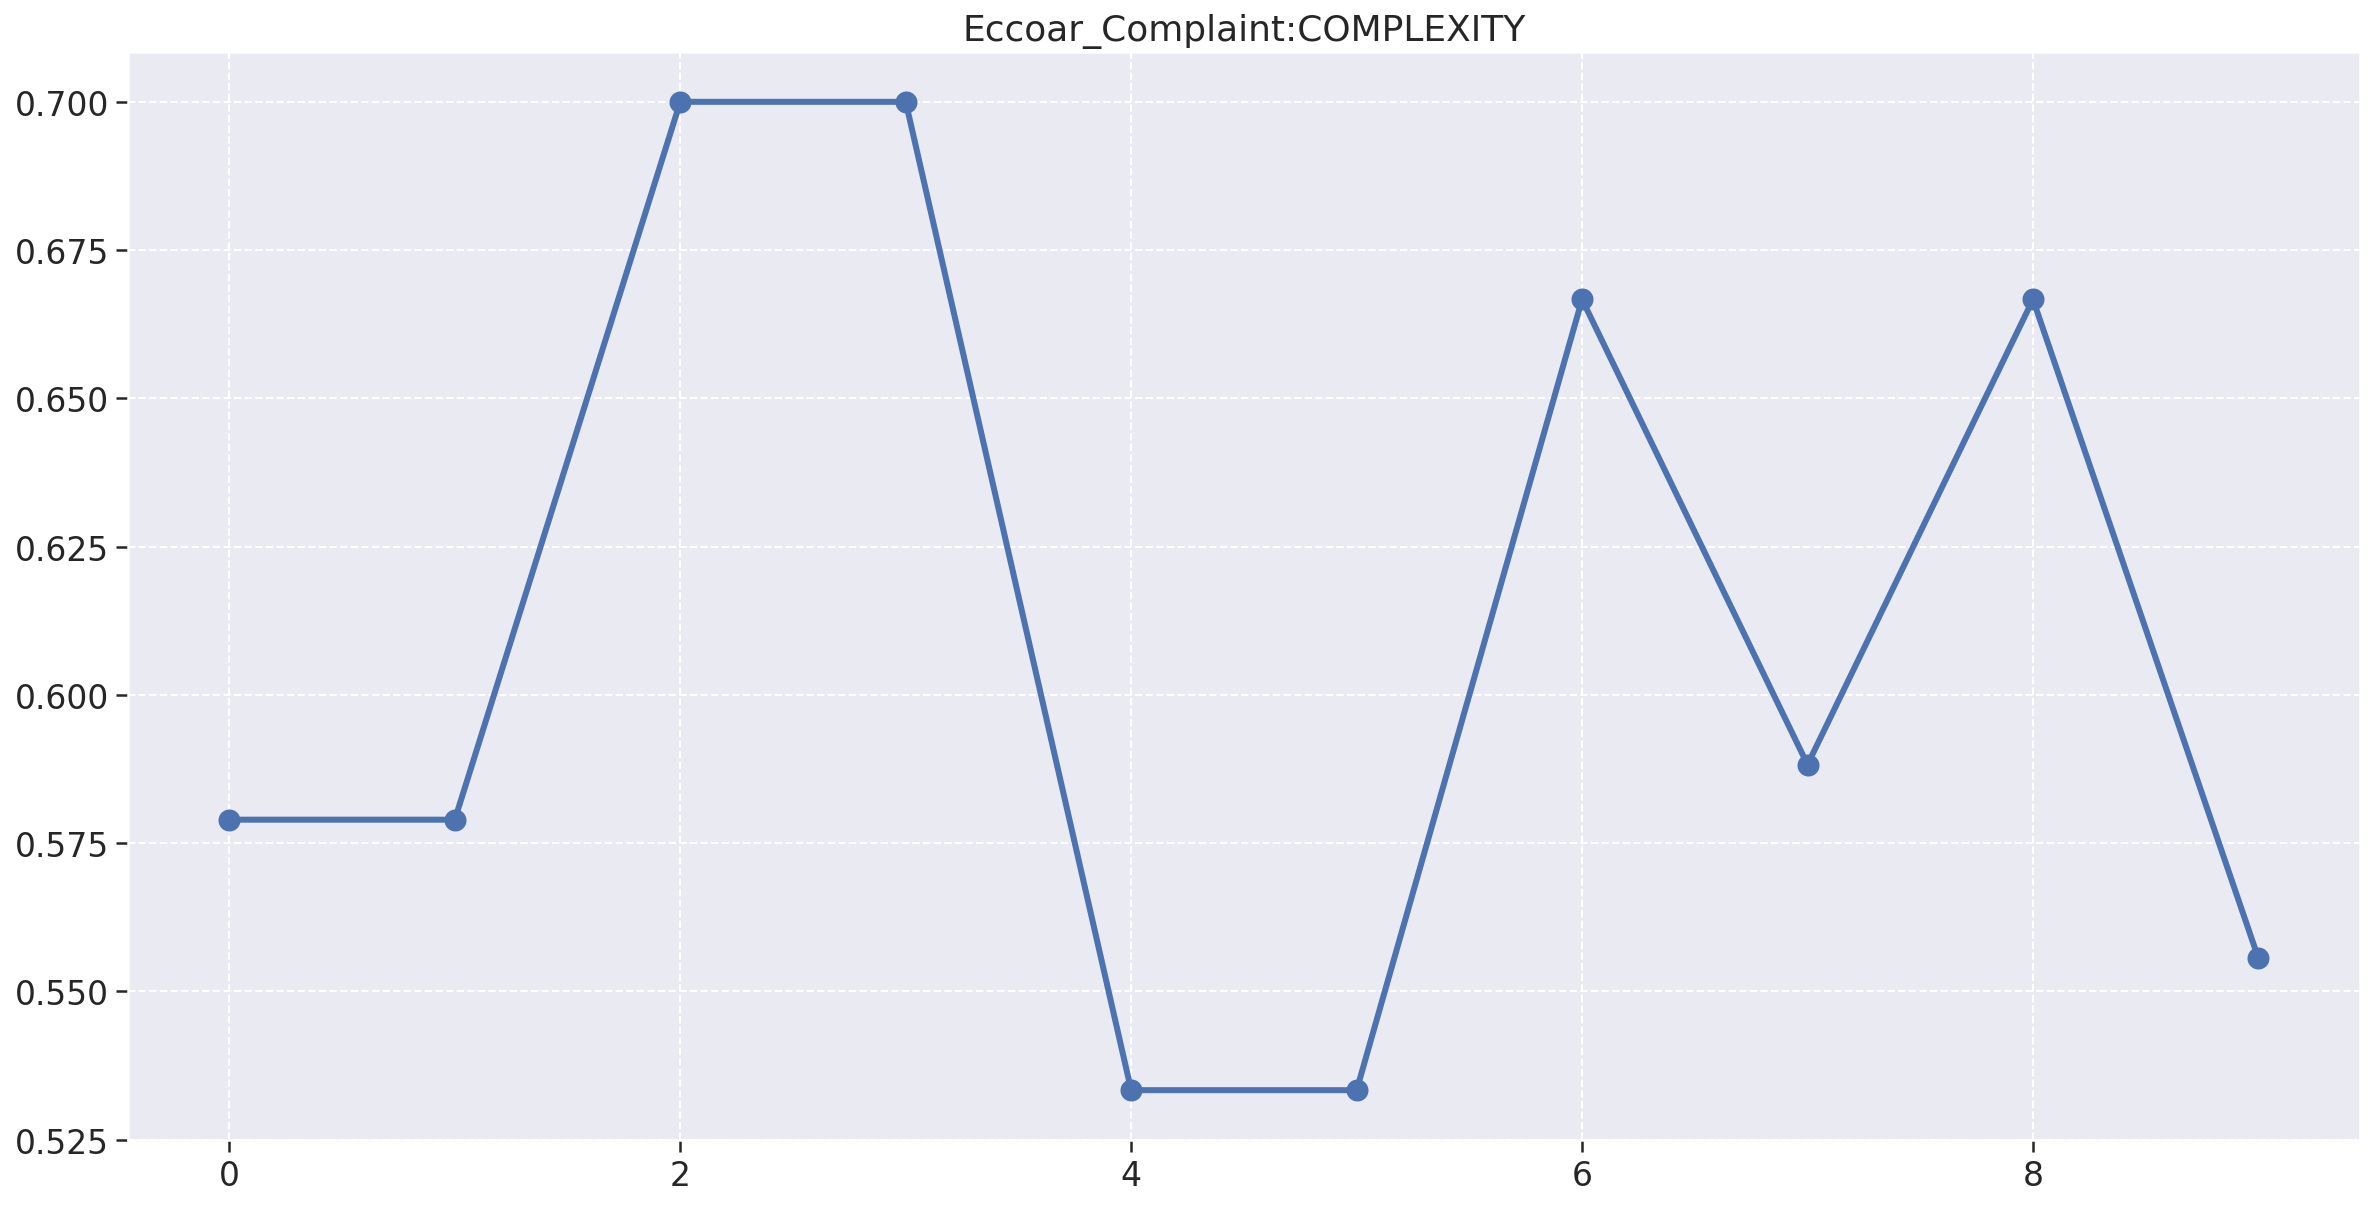

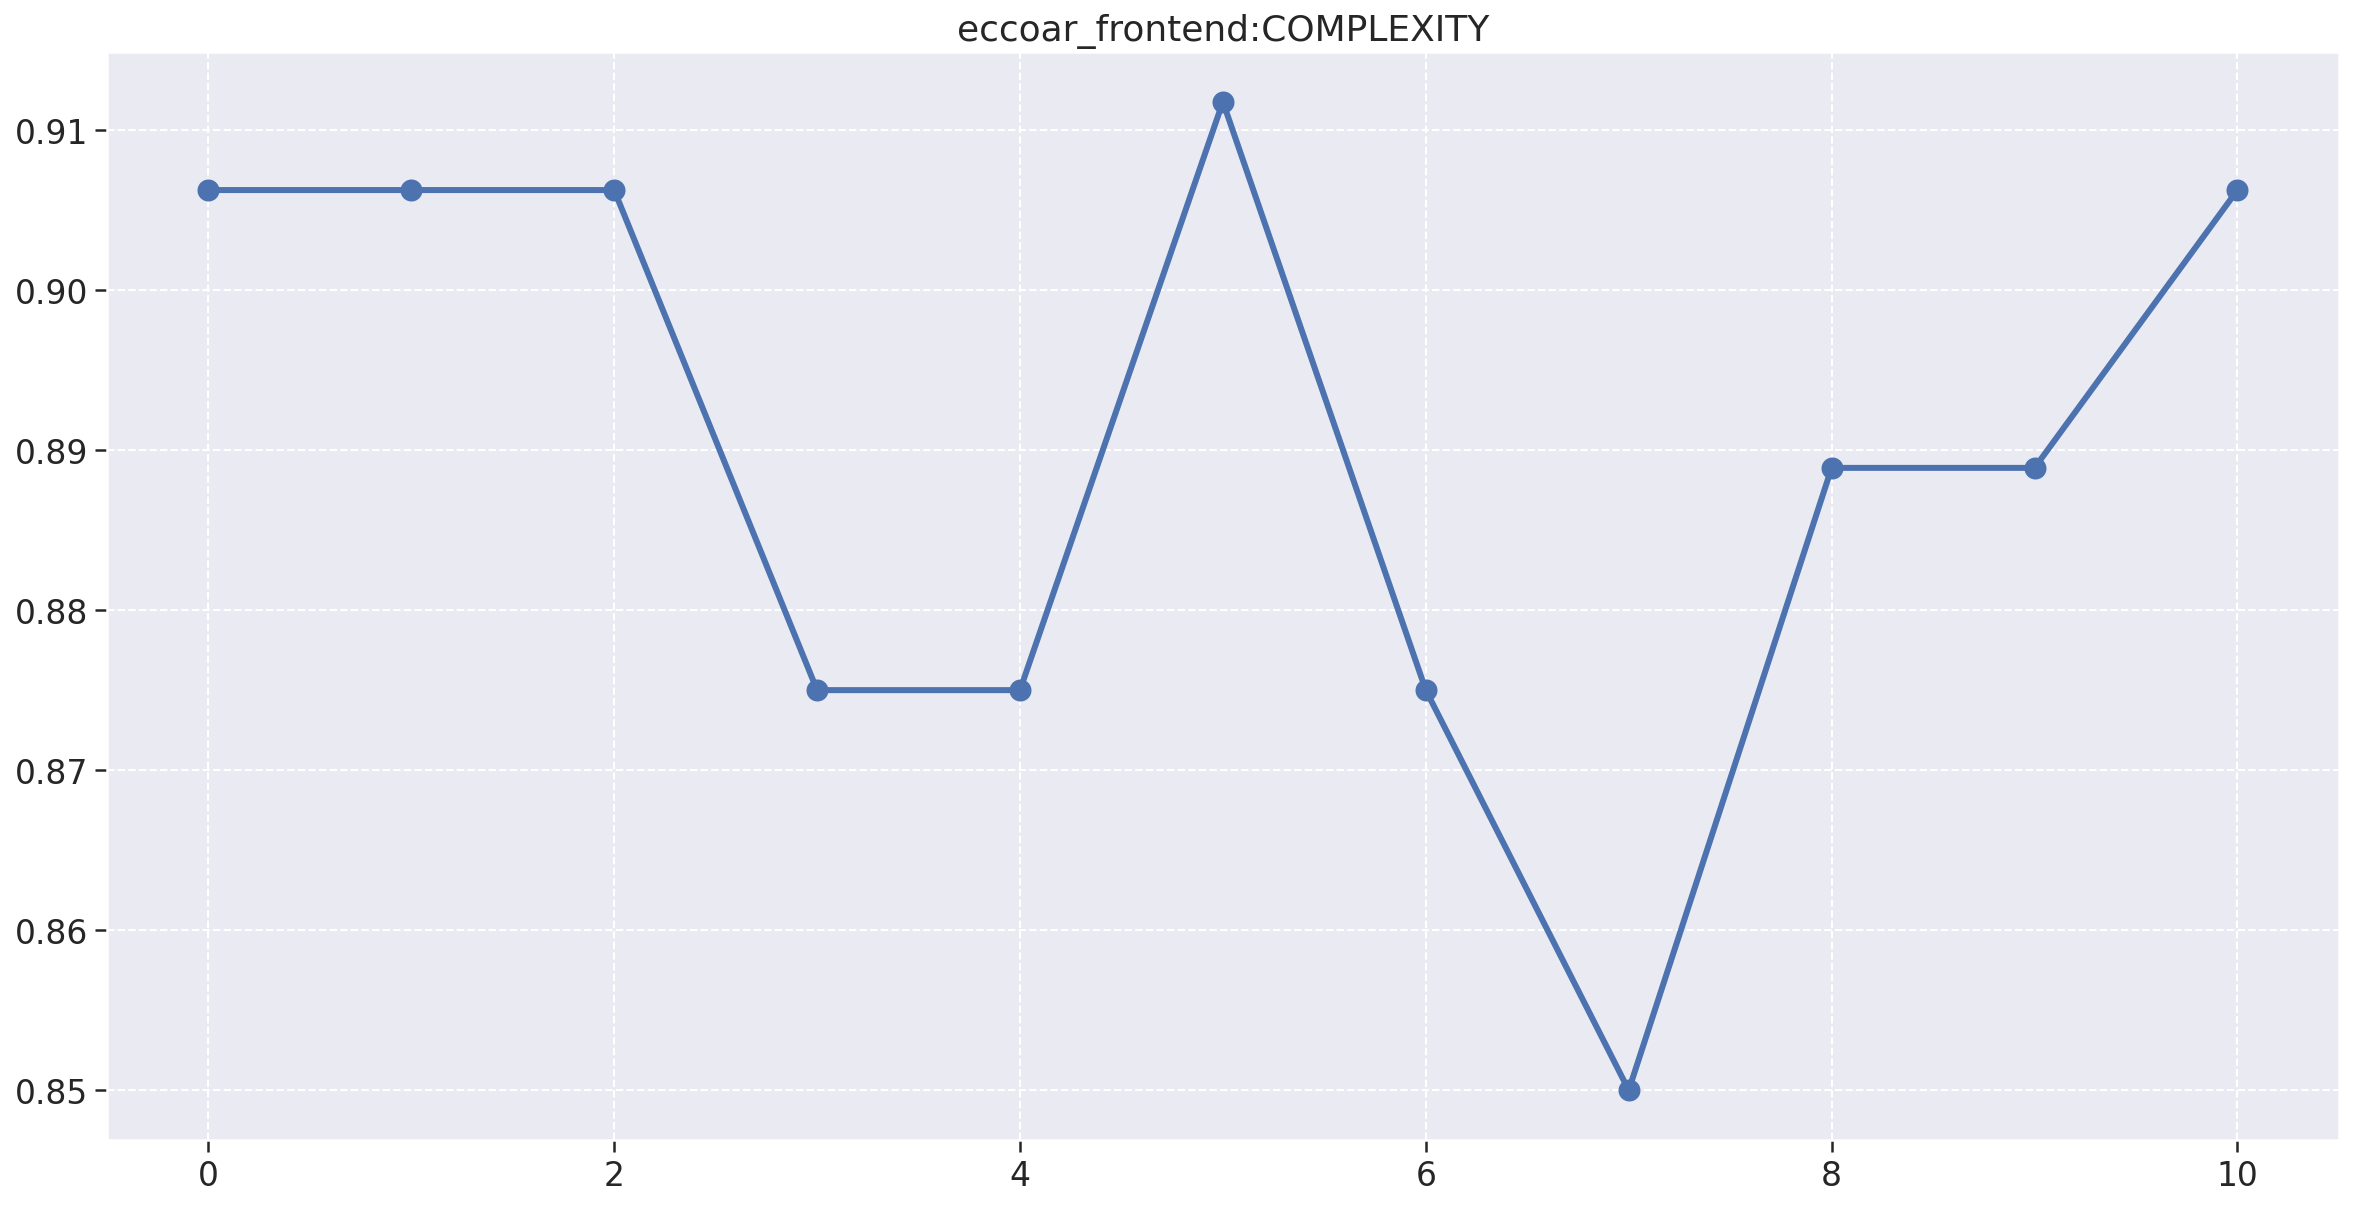

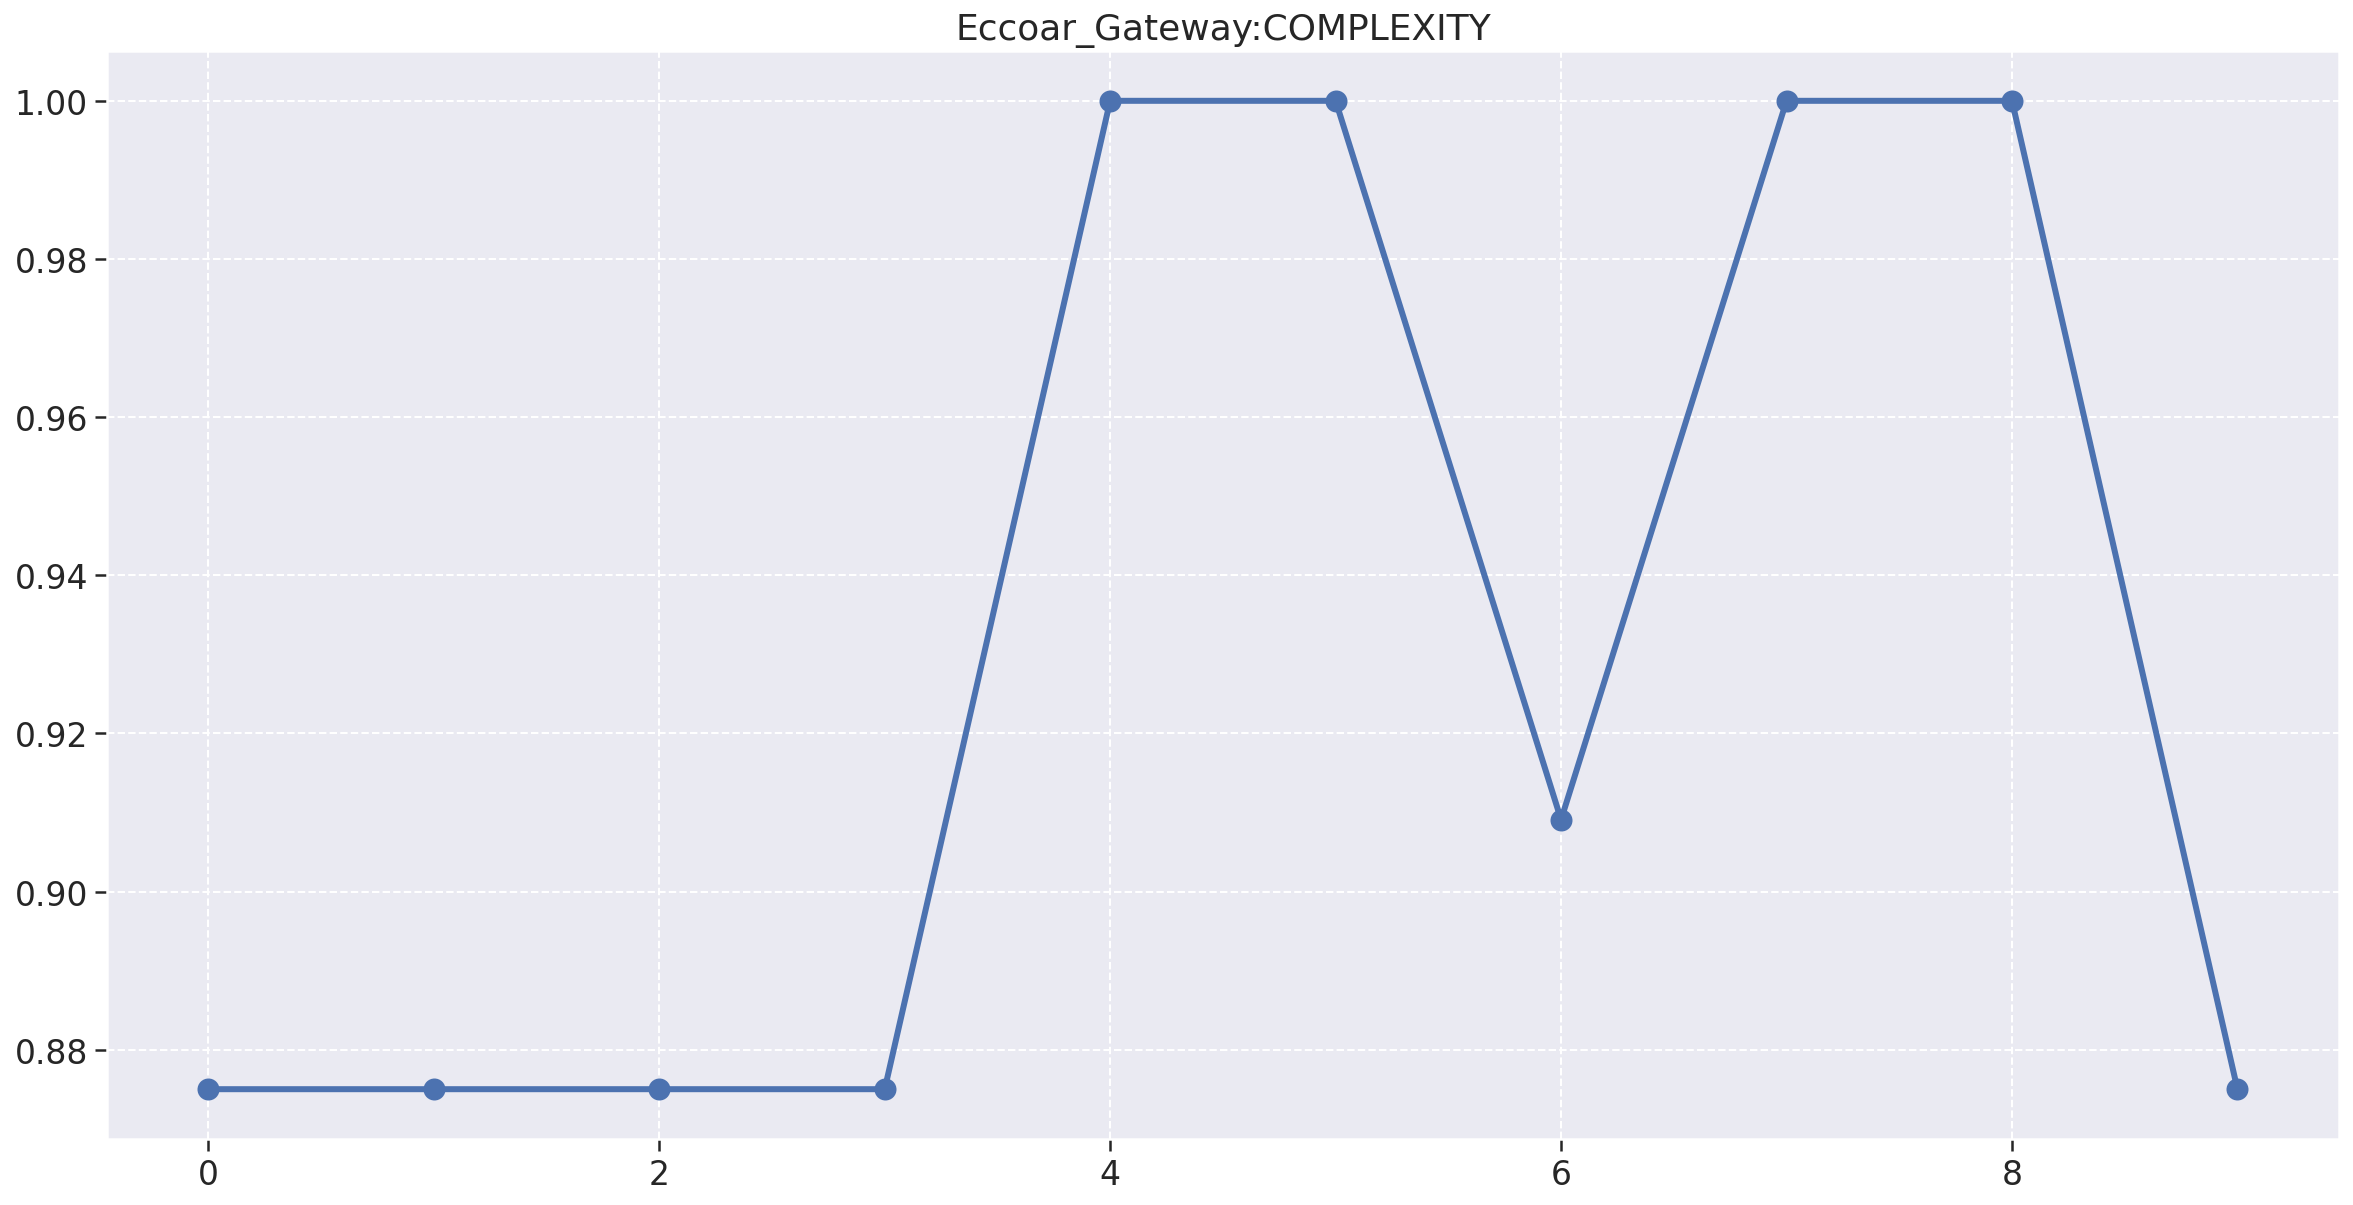

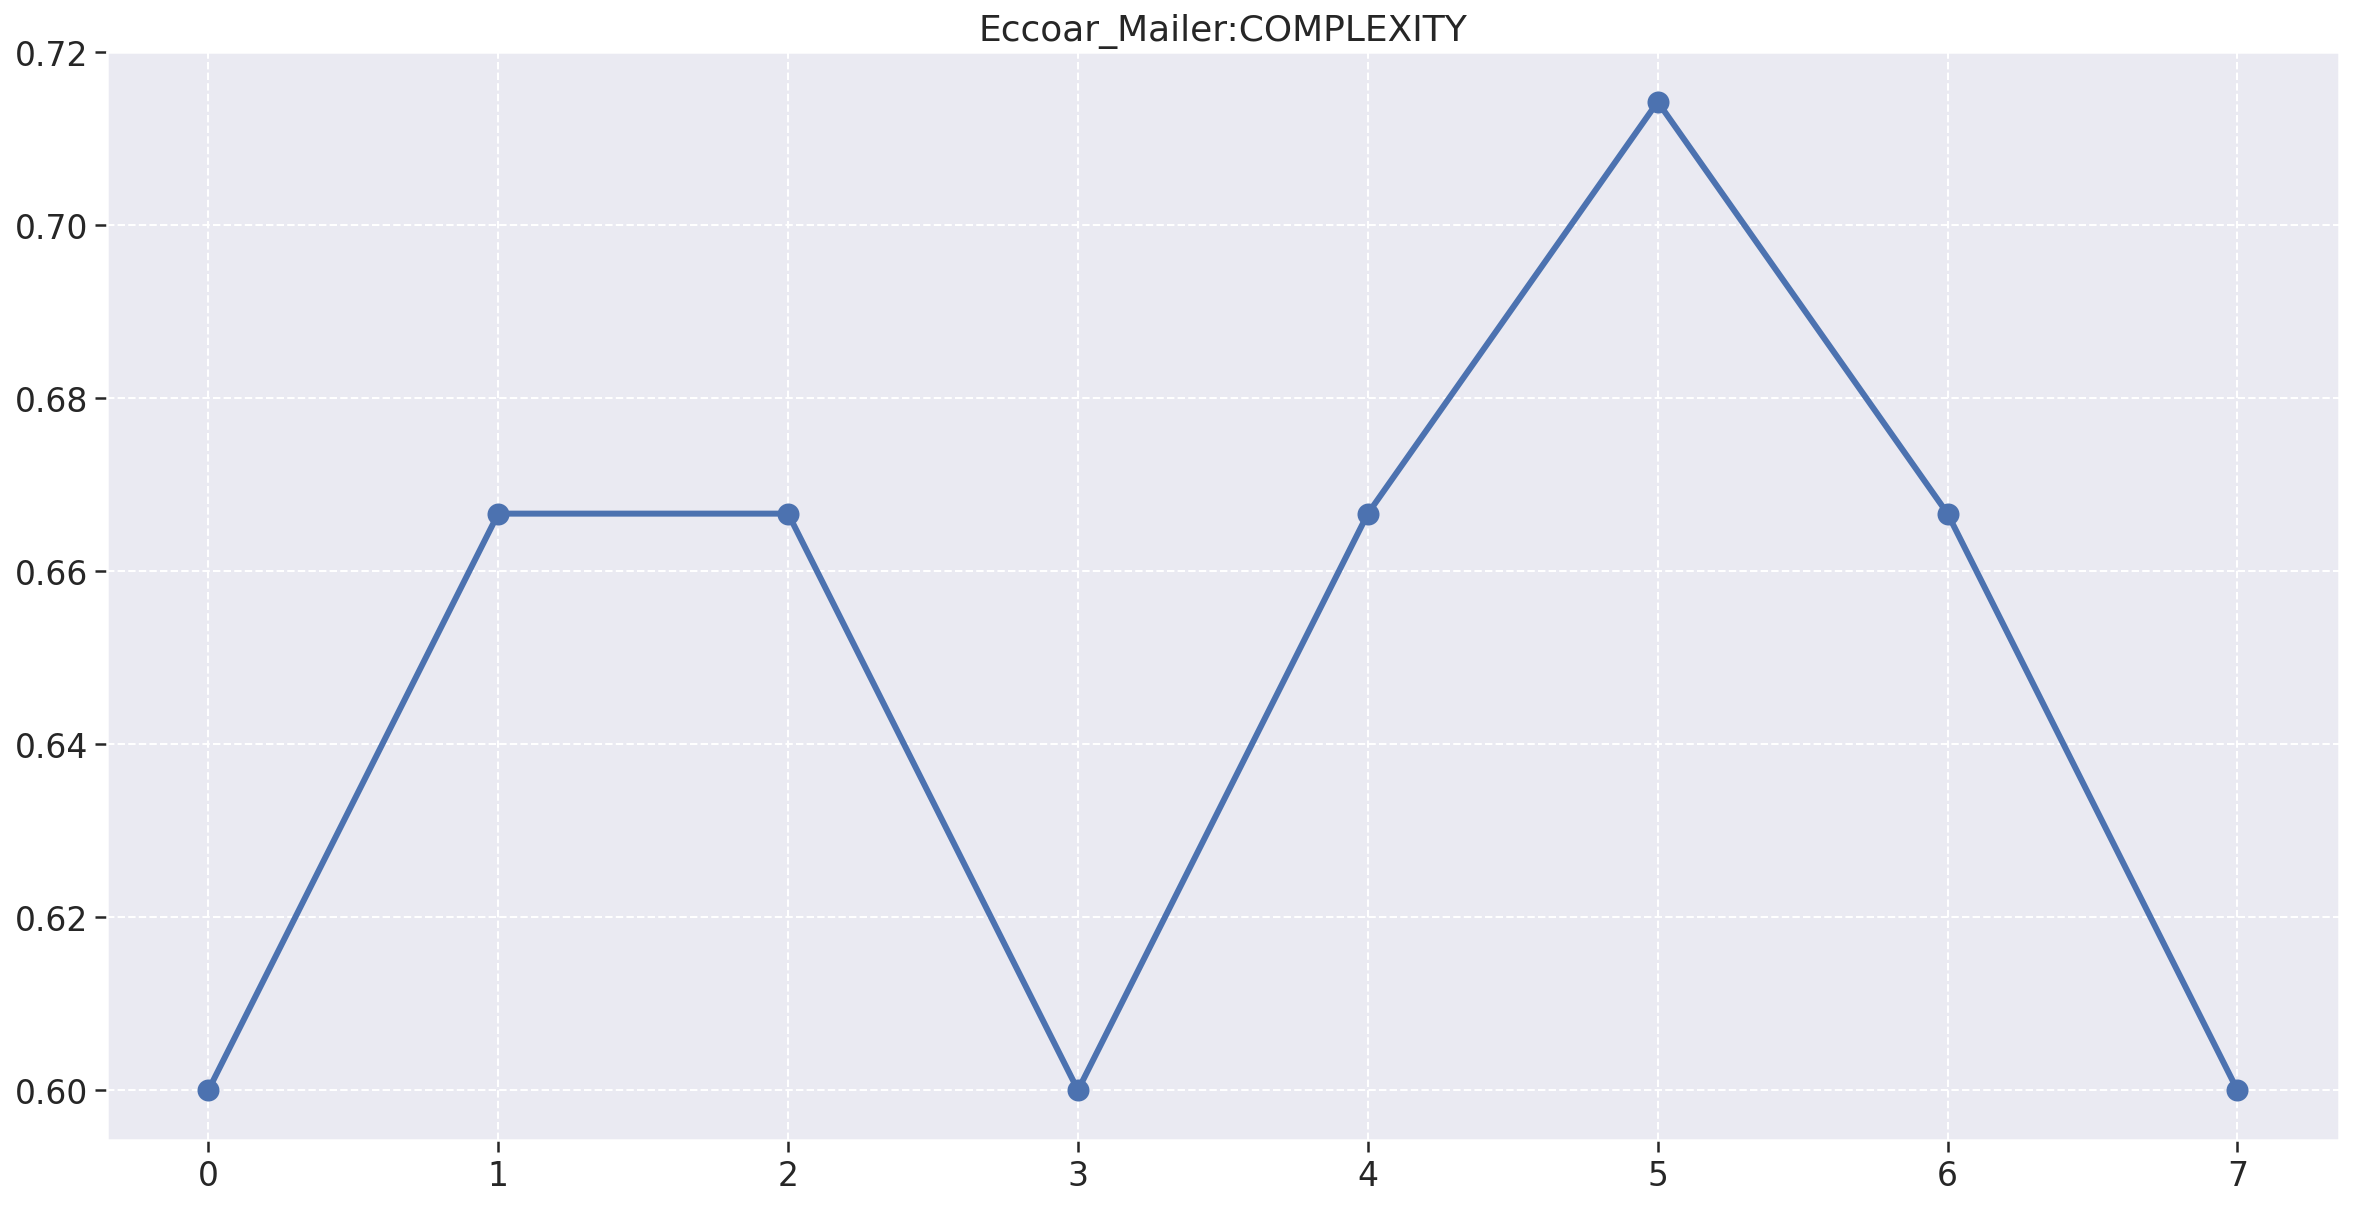

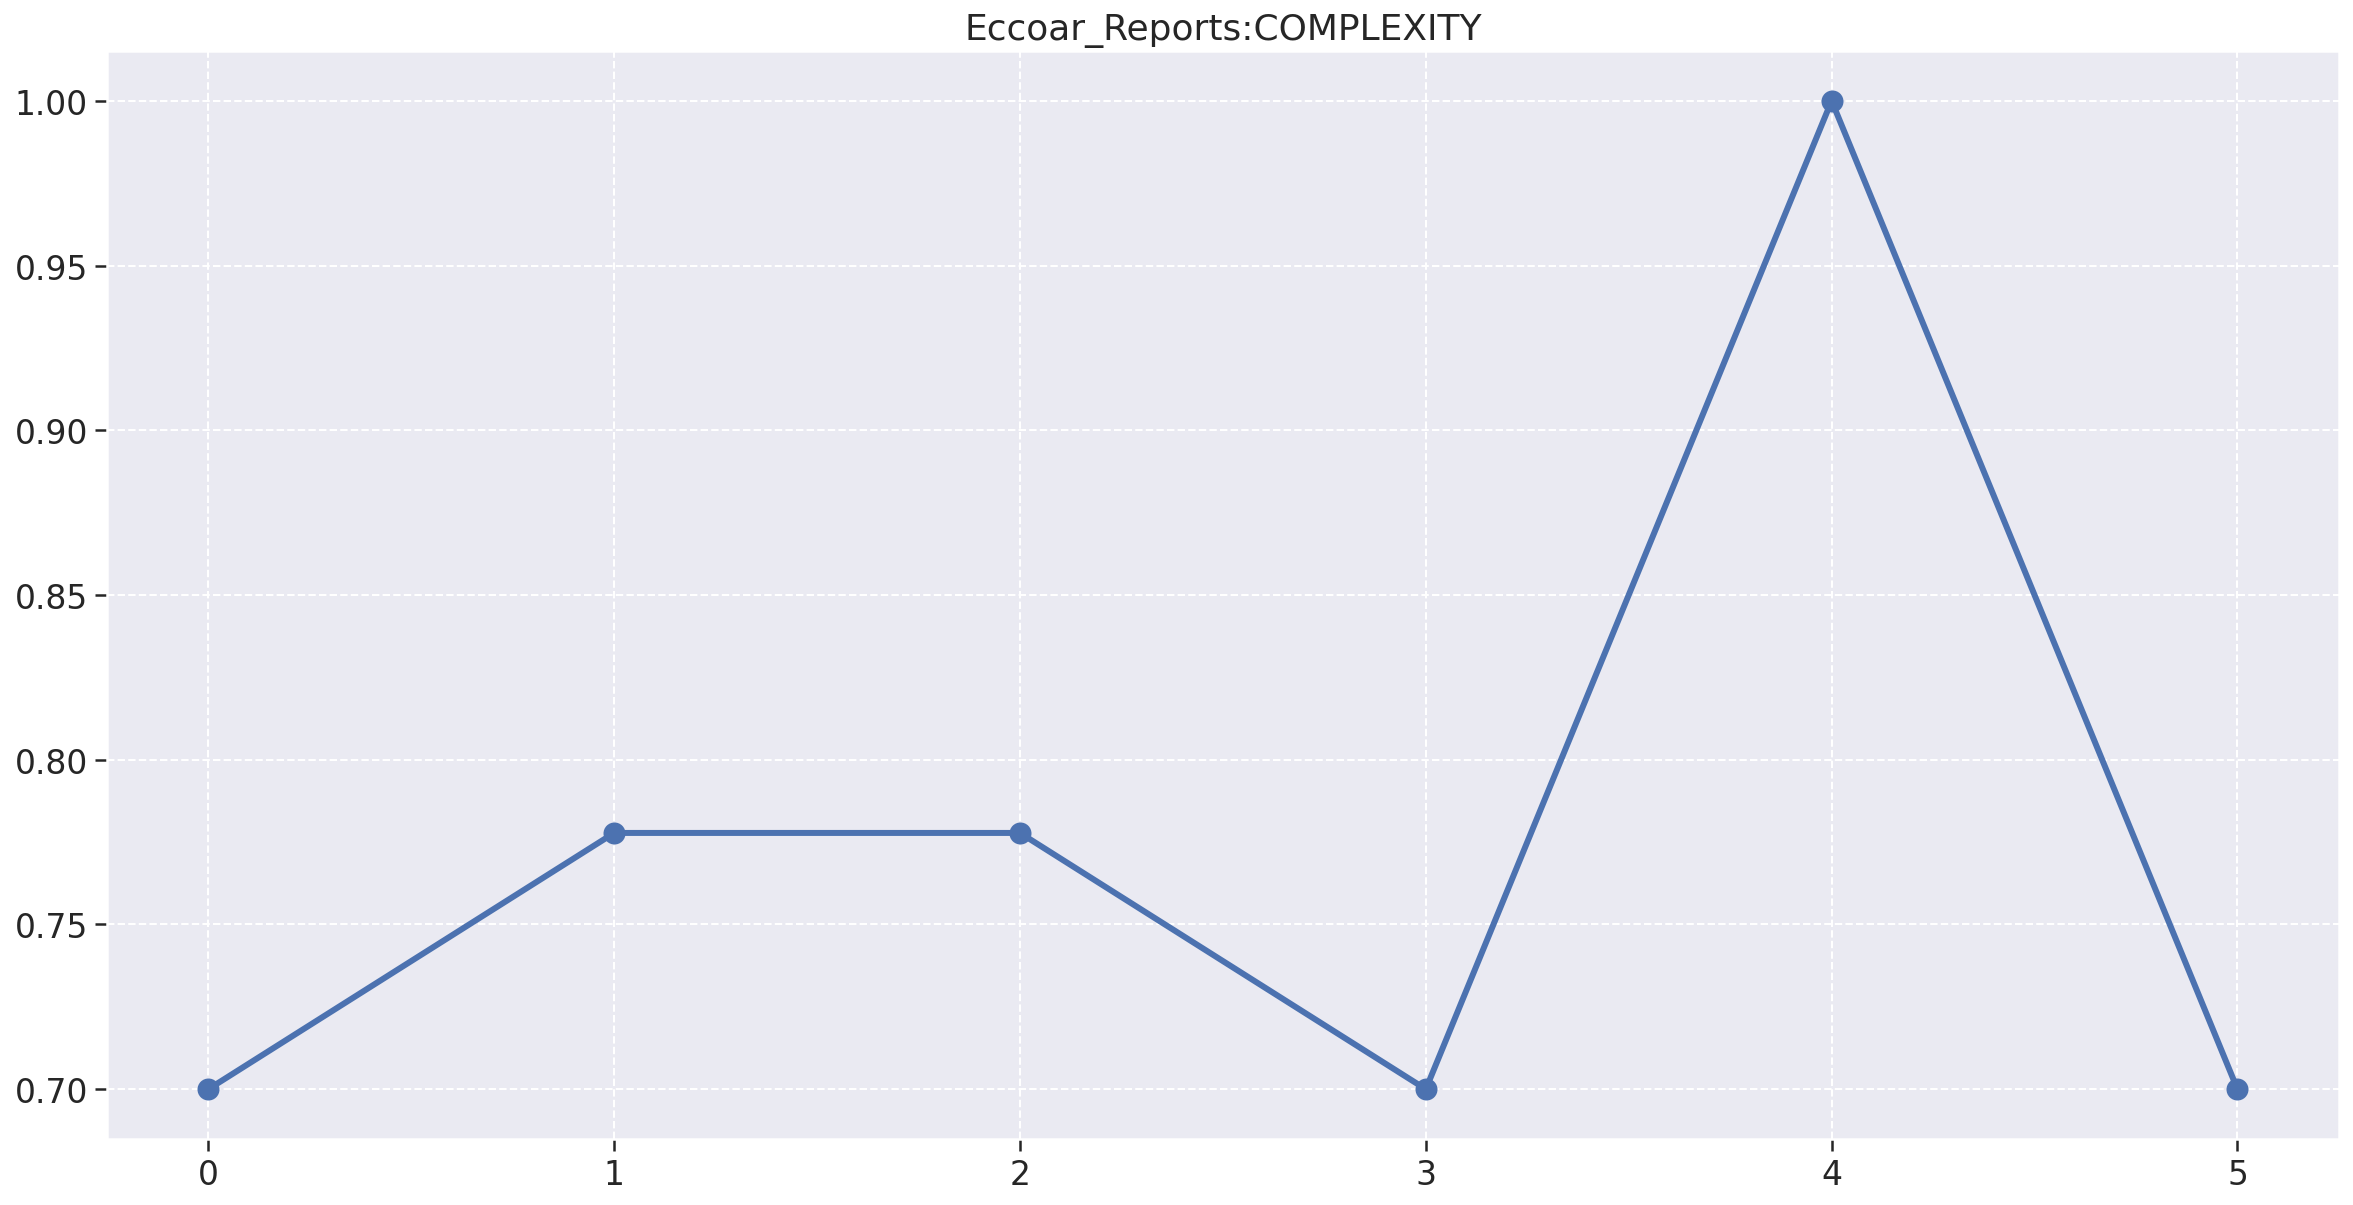

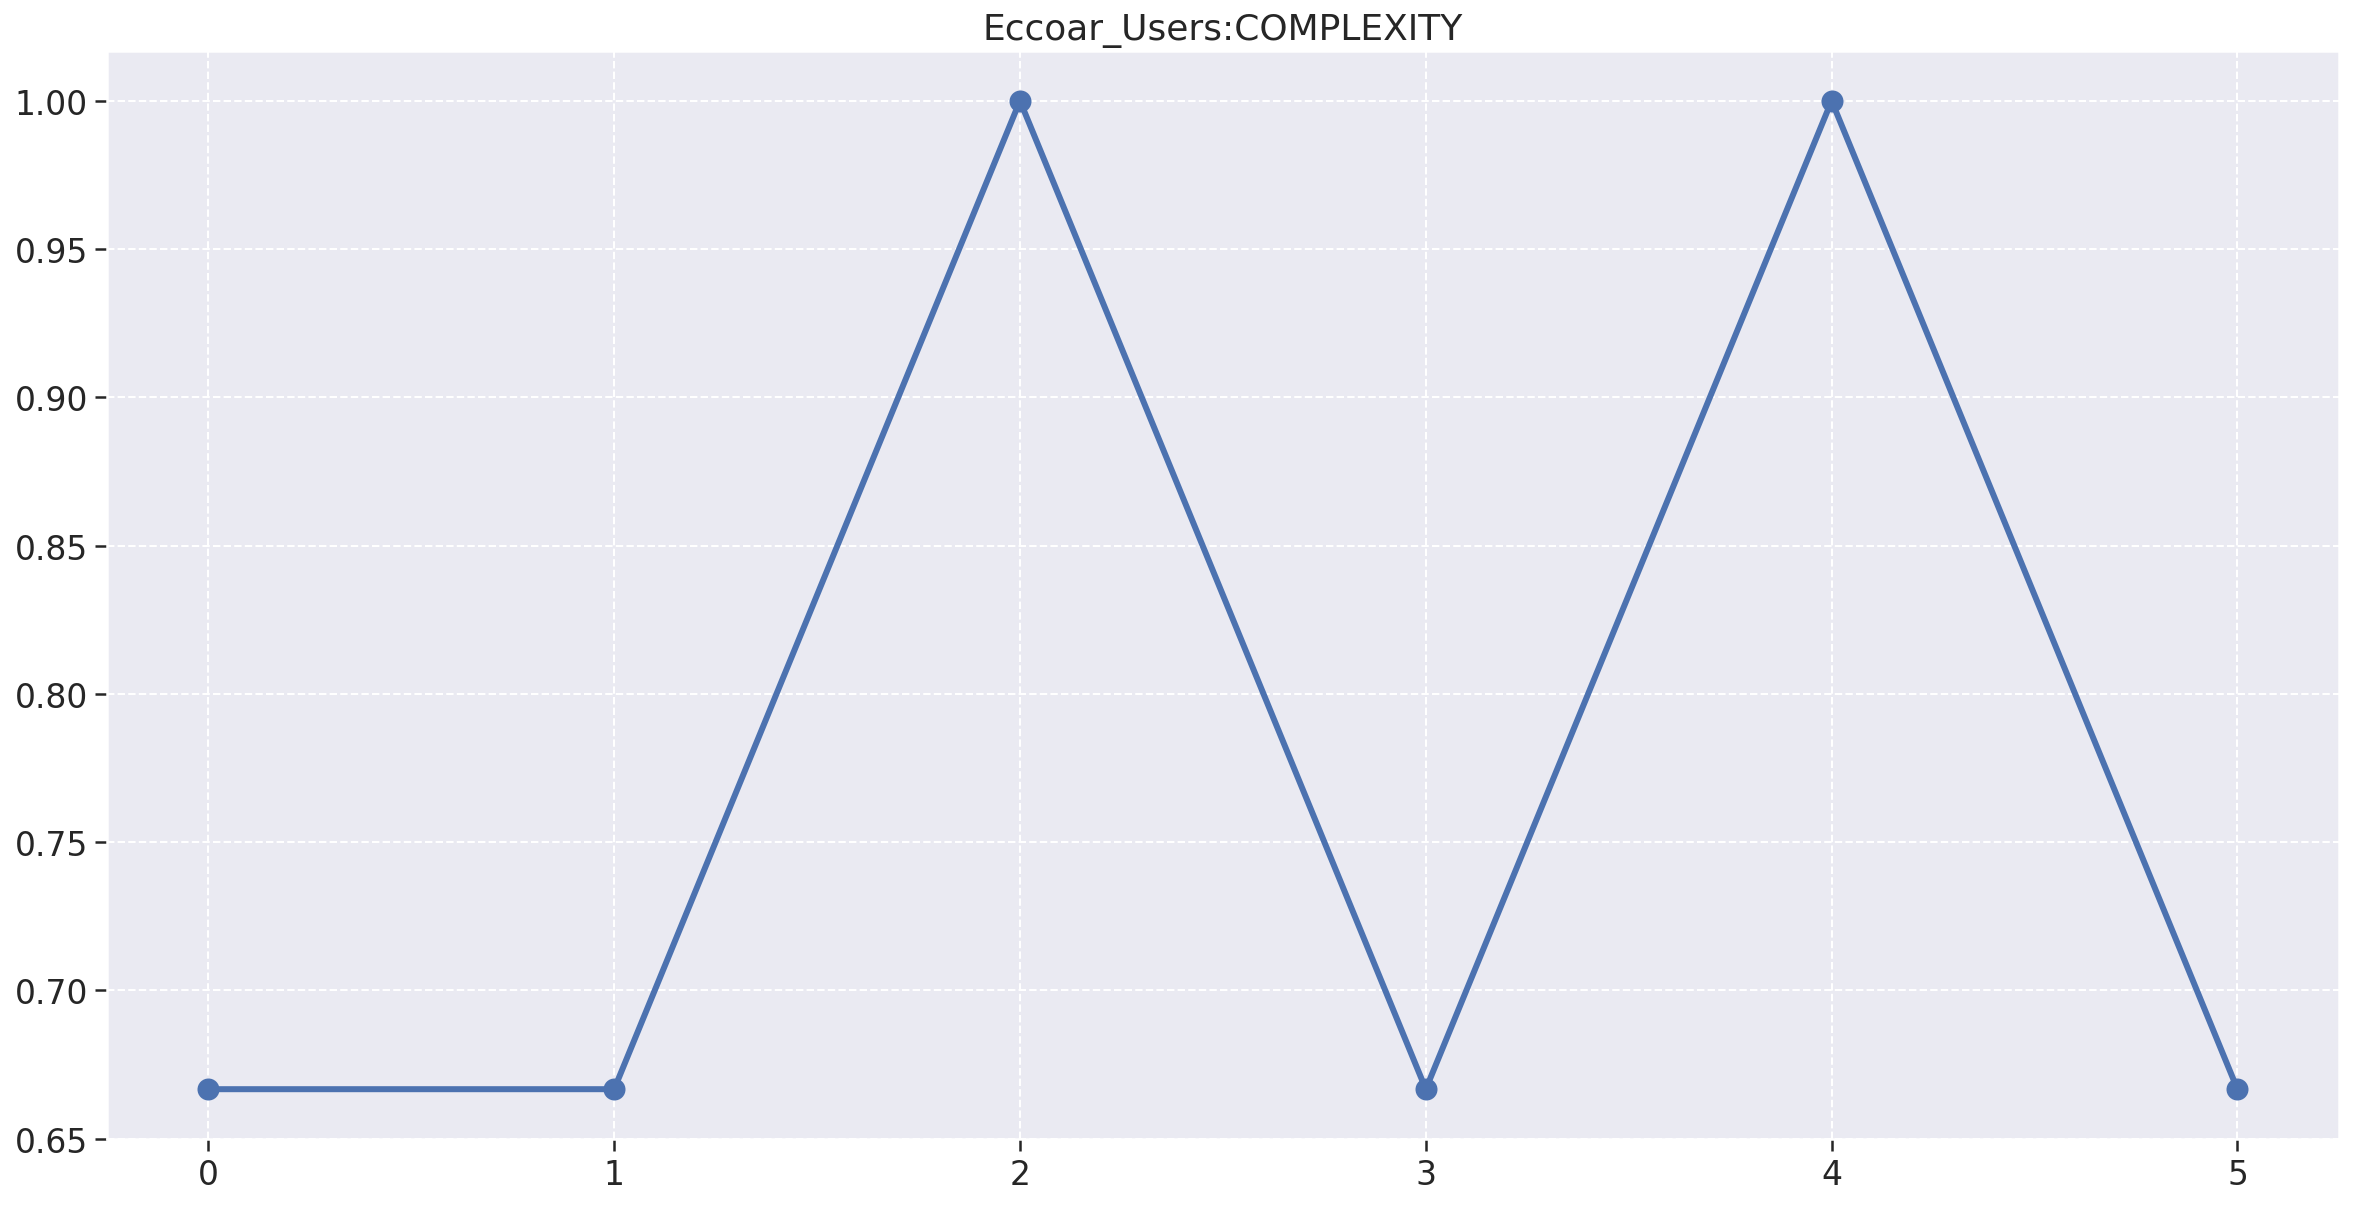

In [133]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)

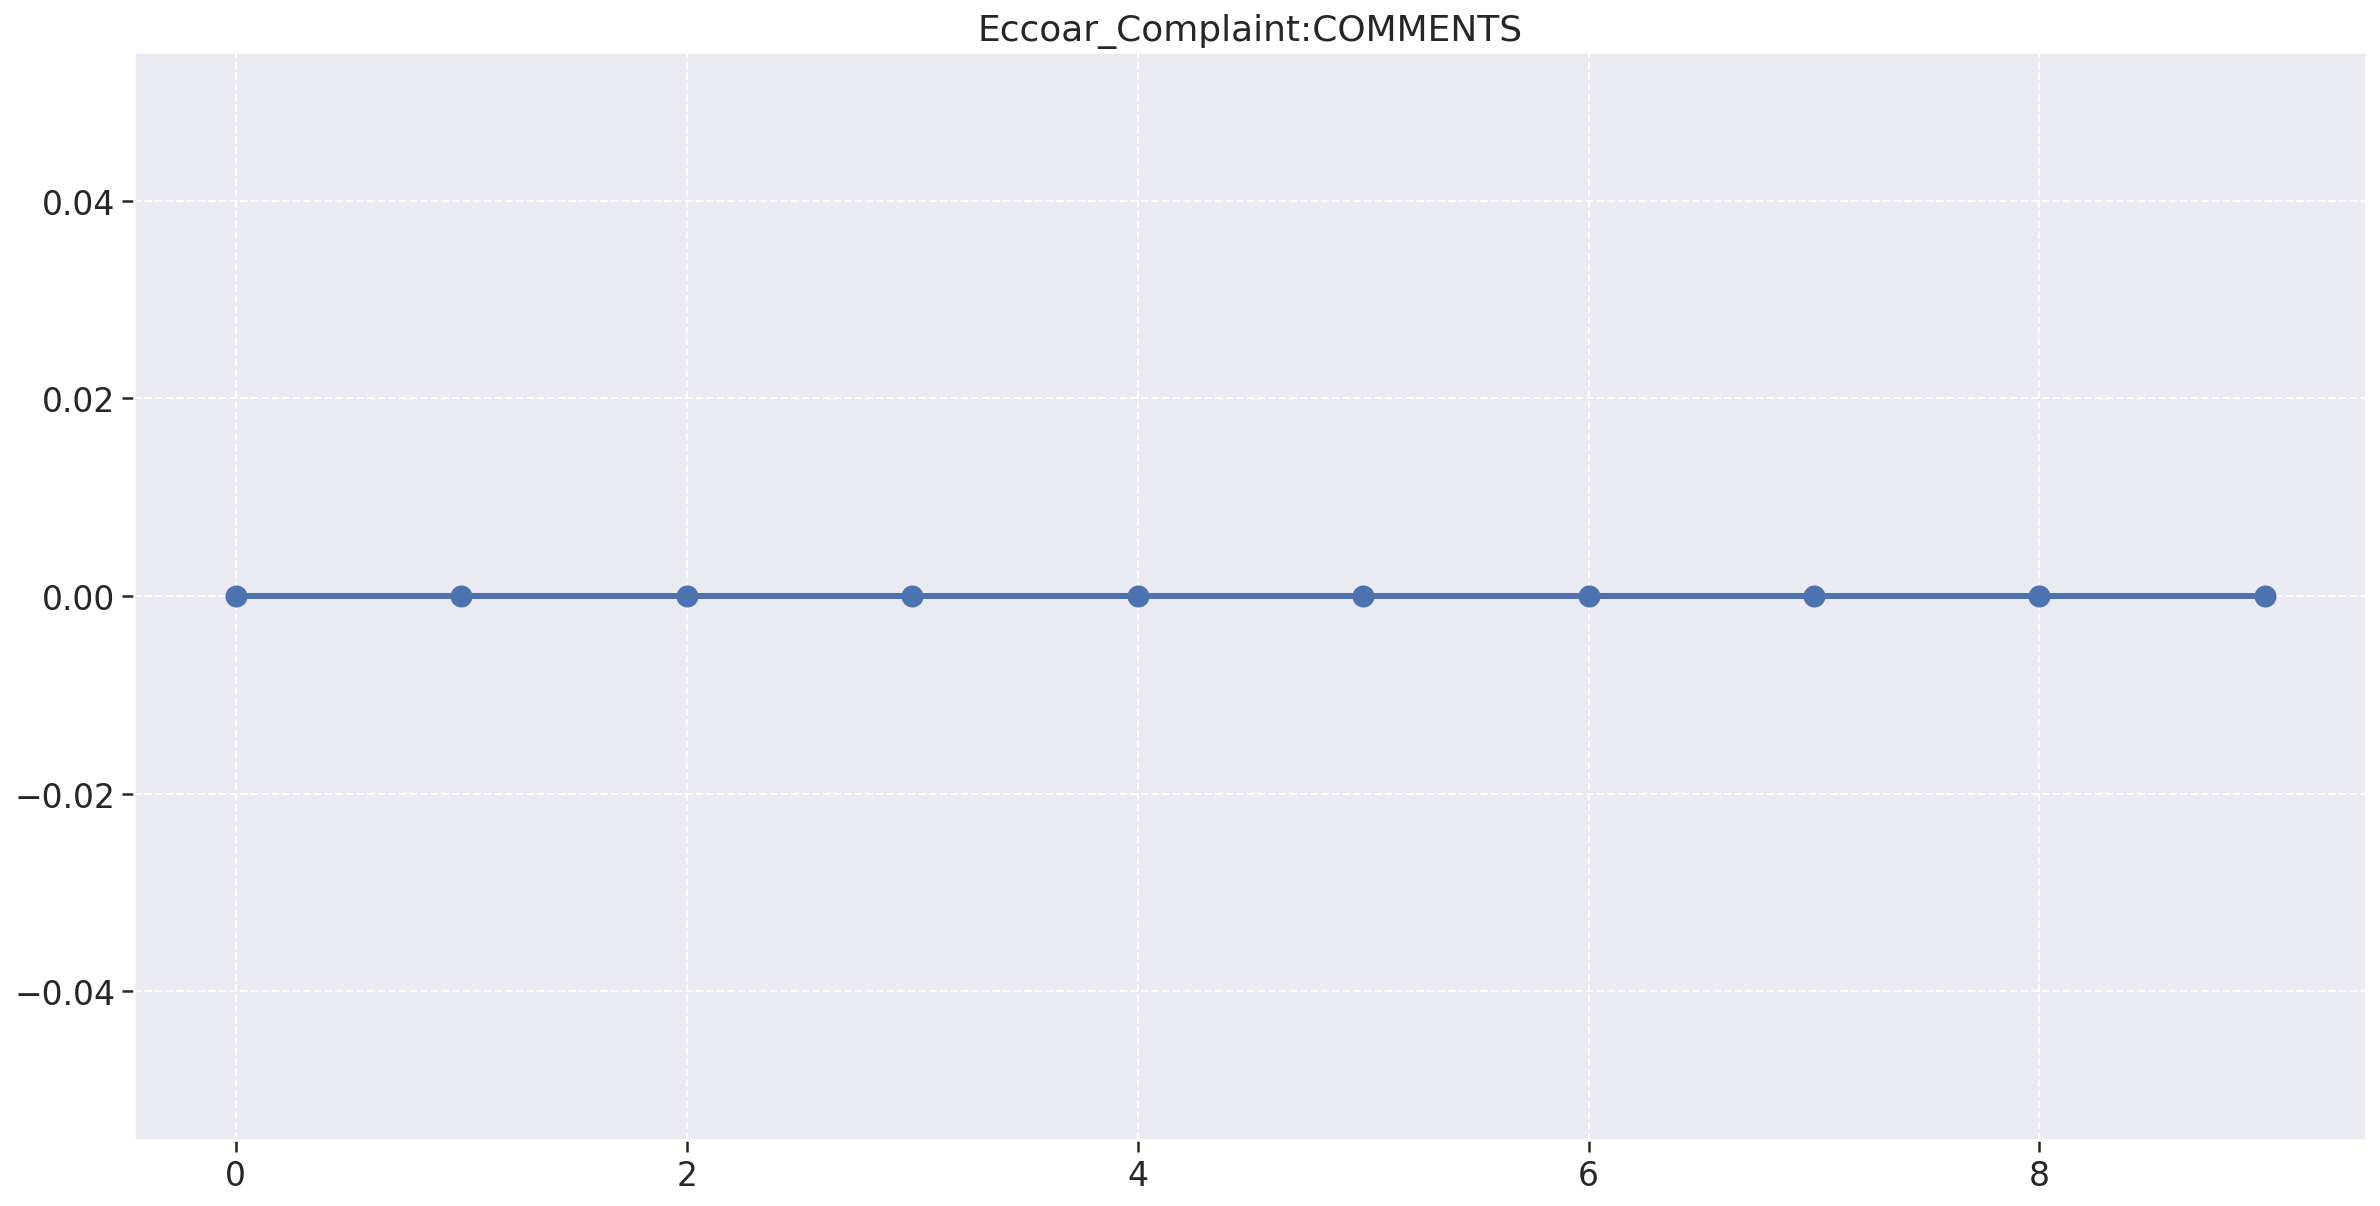

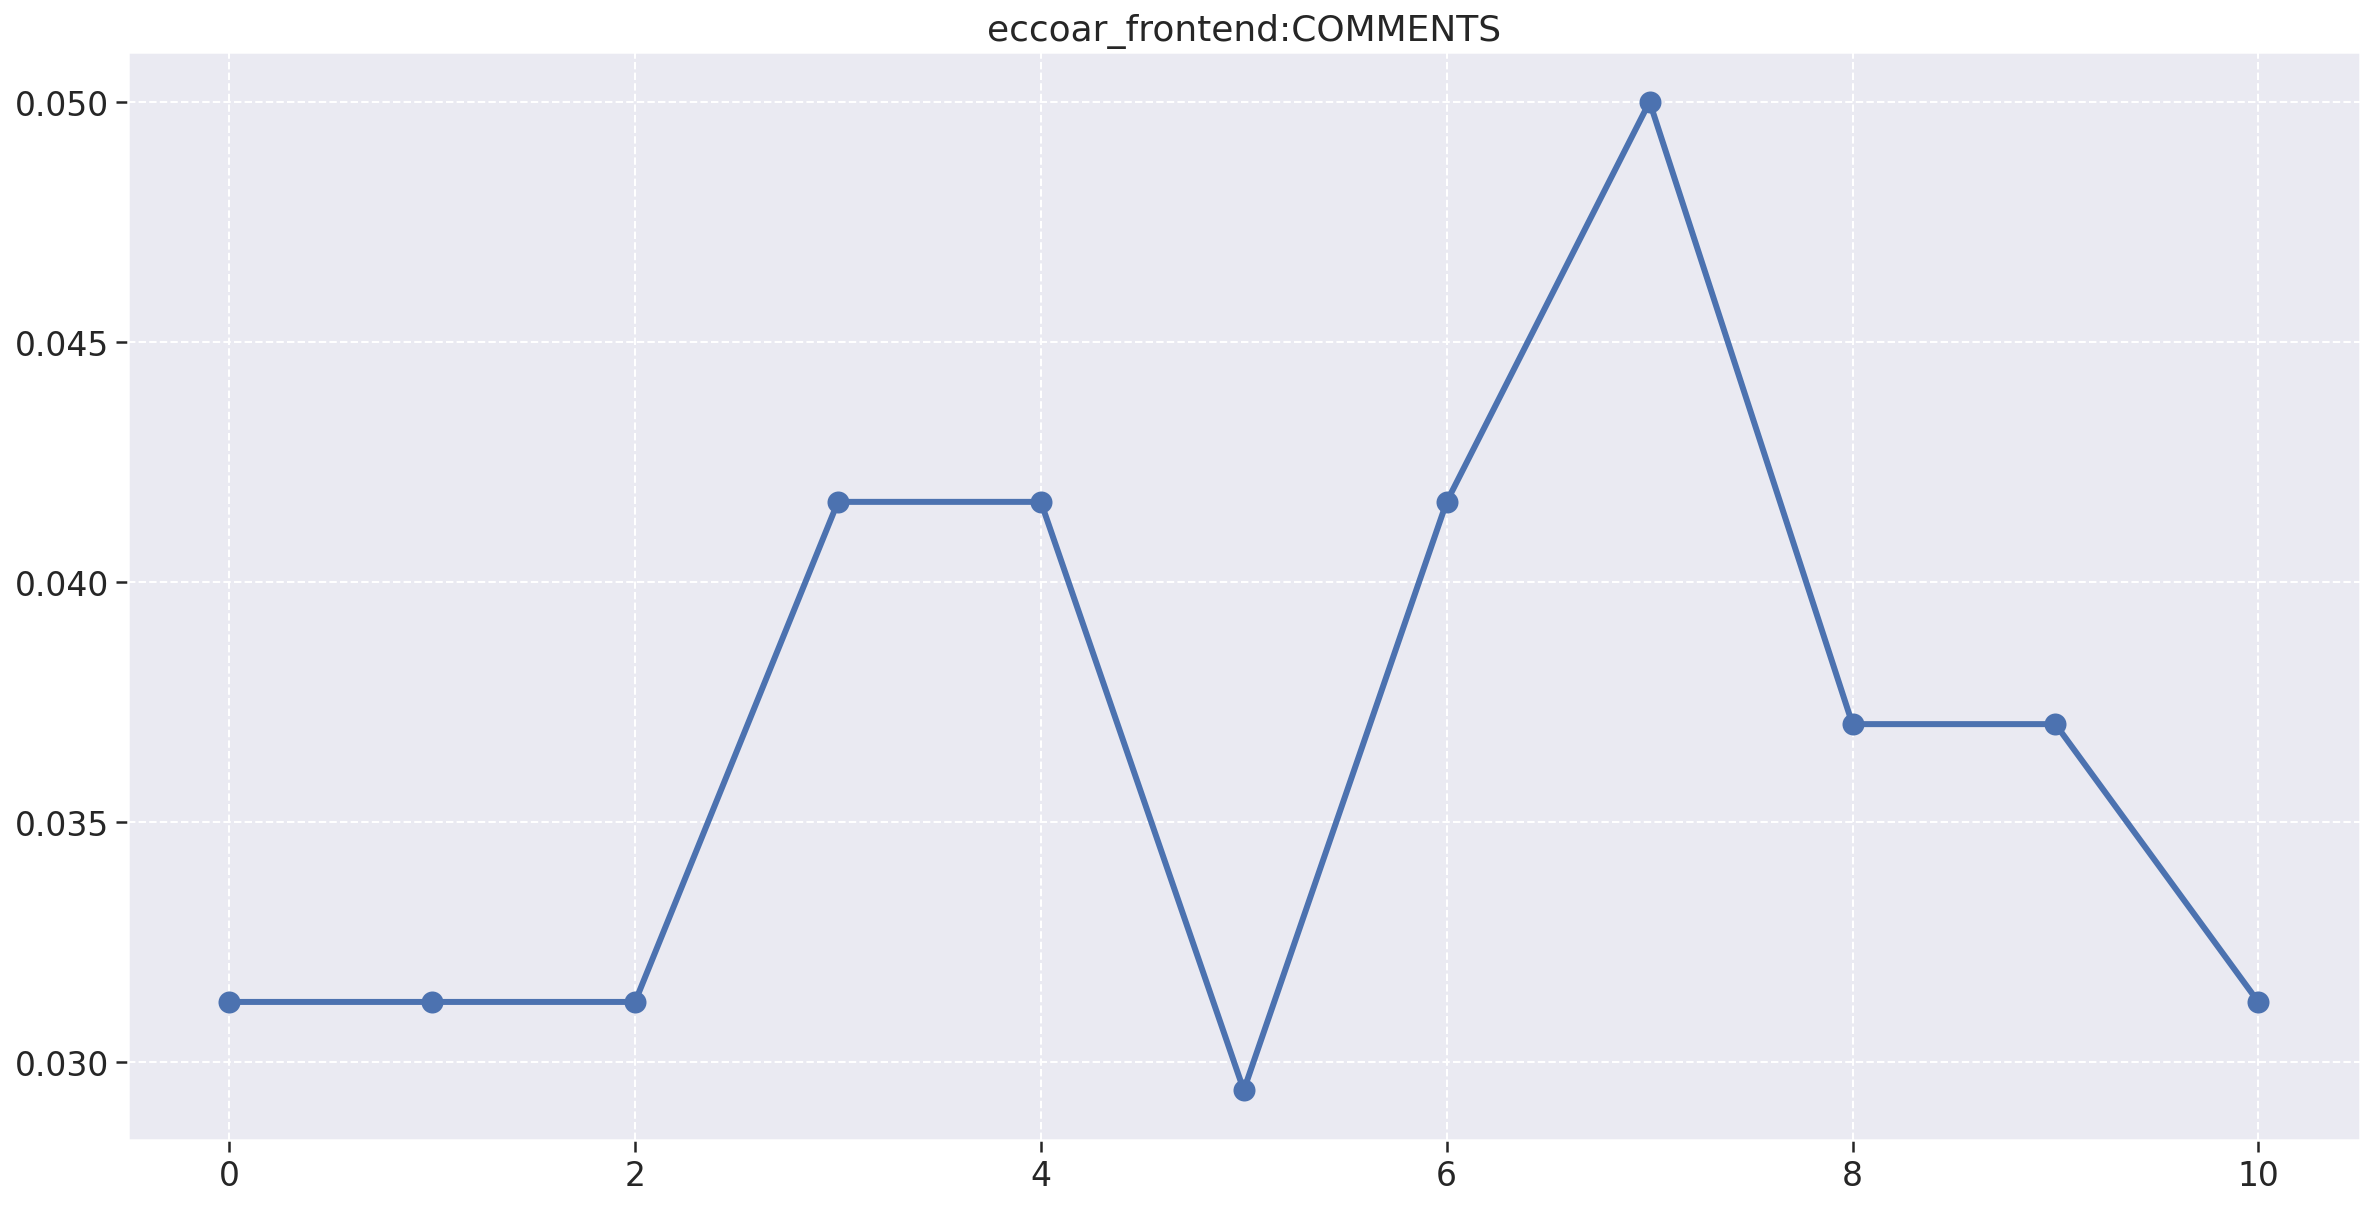

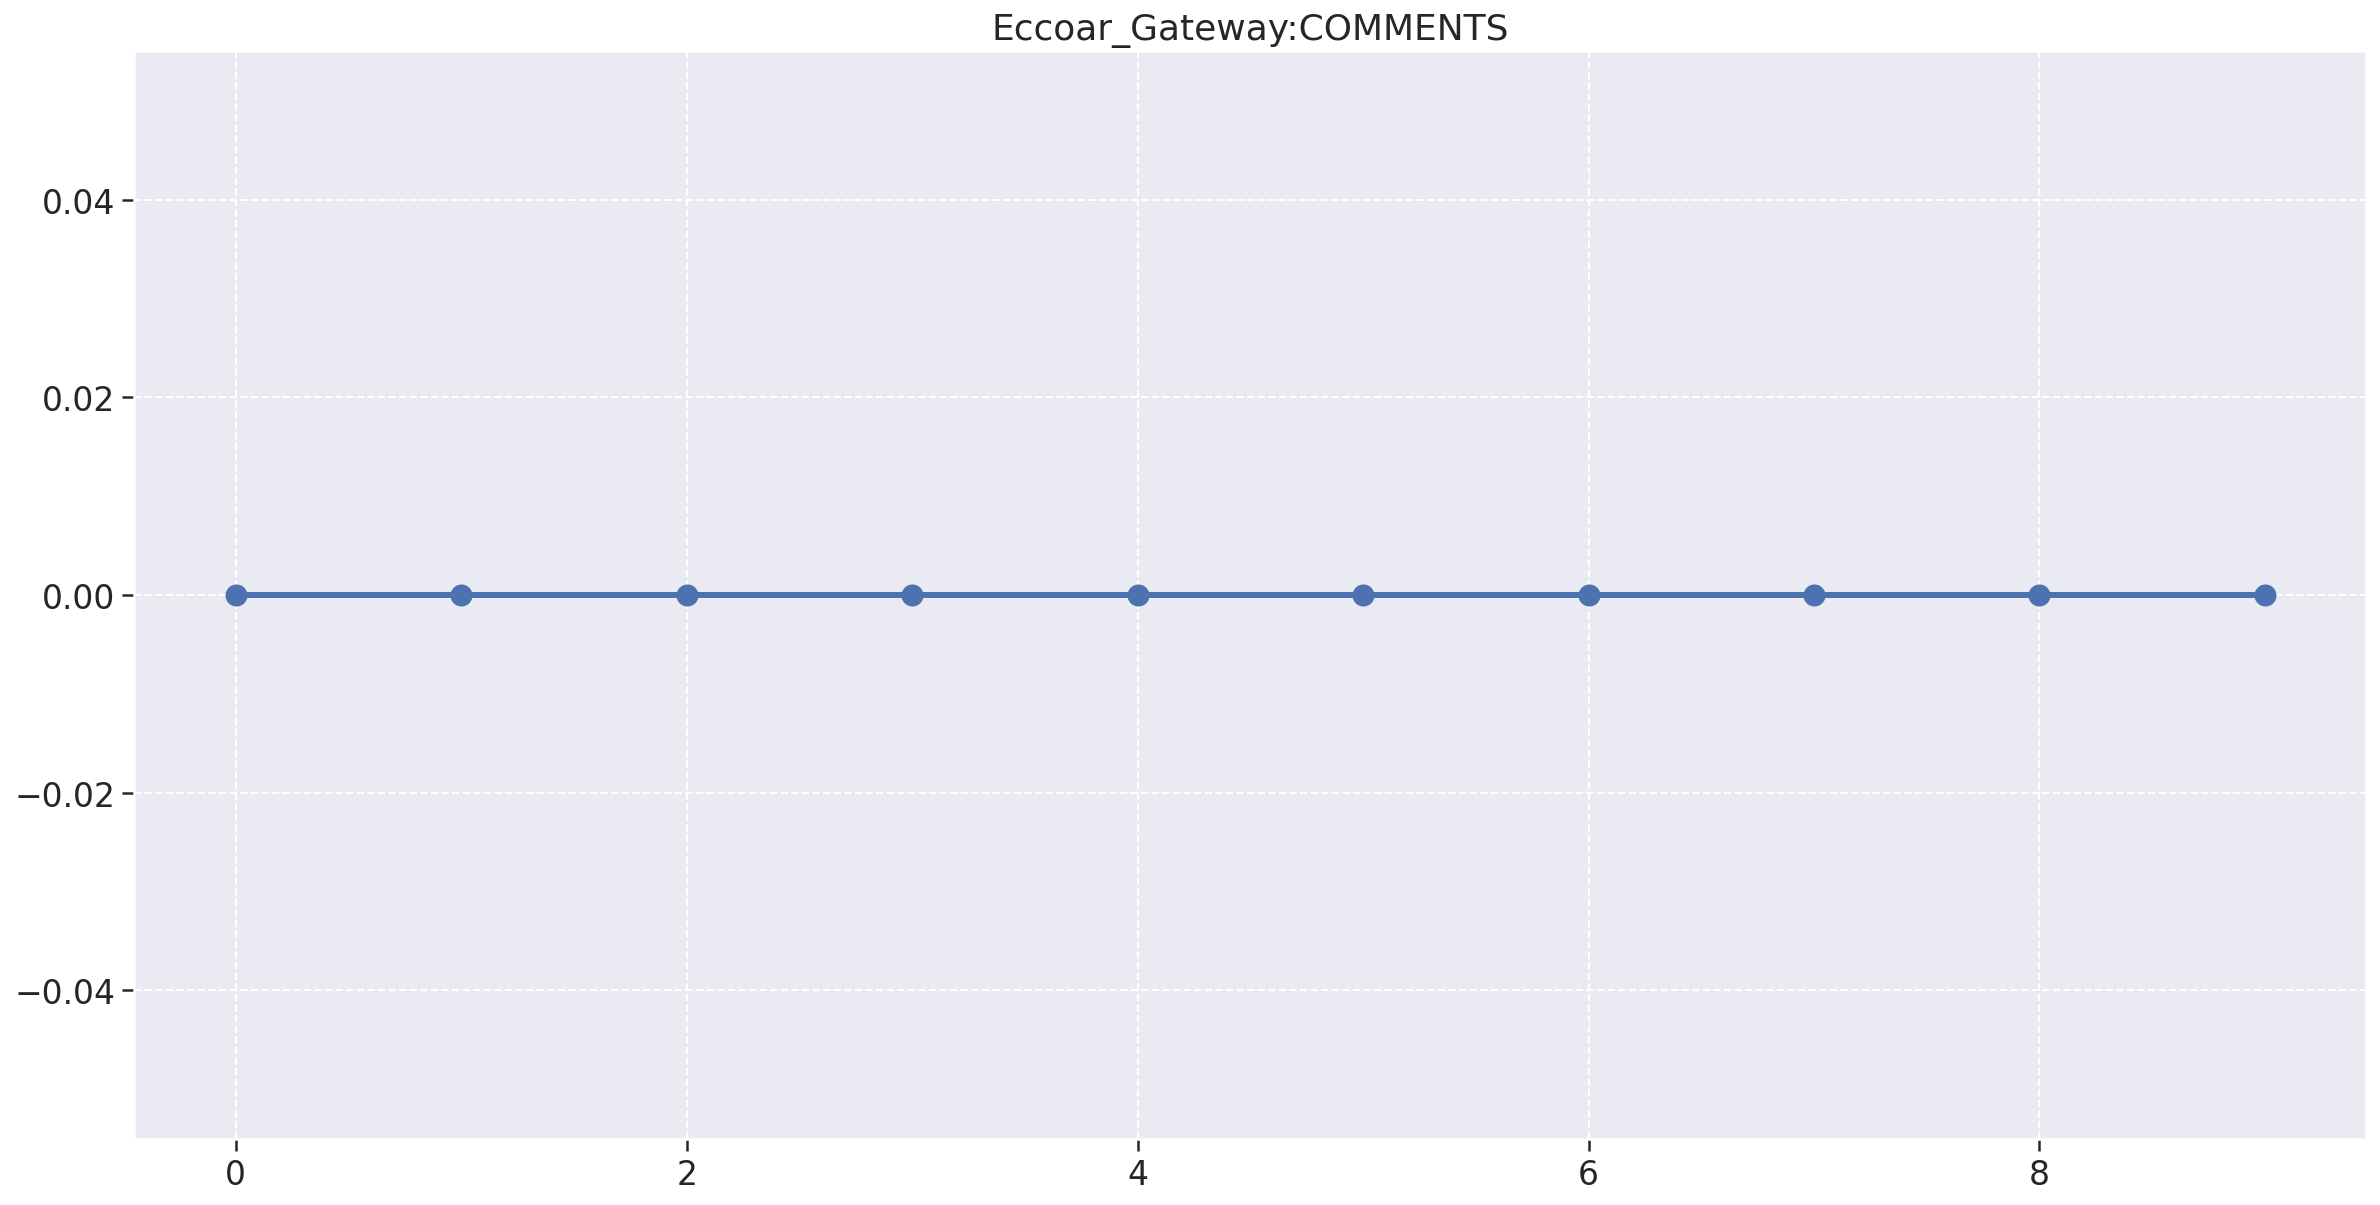

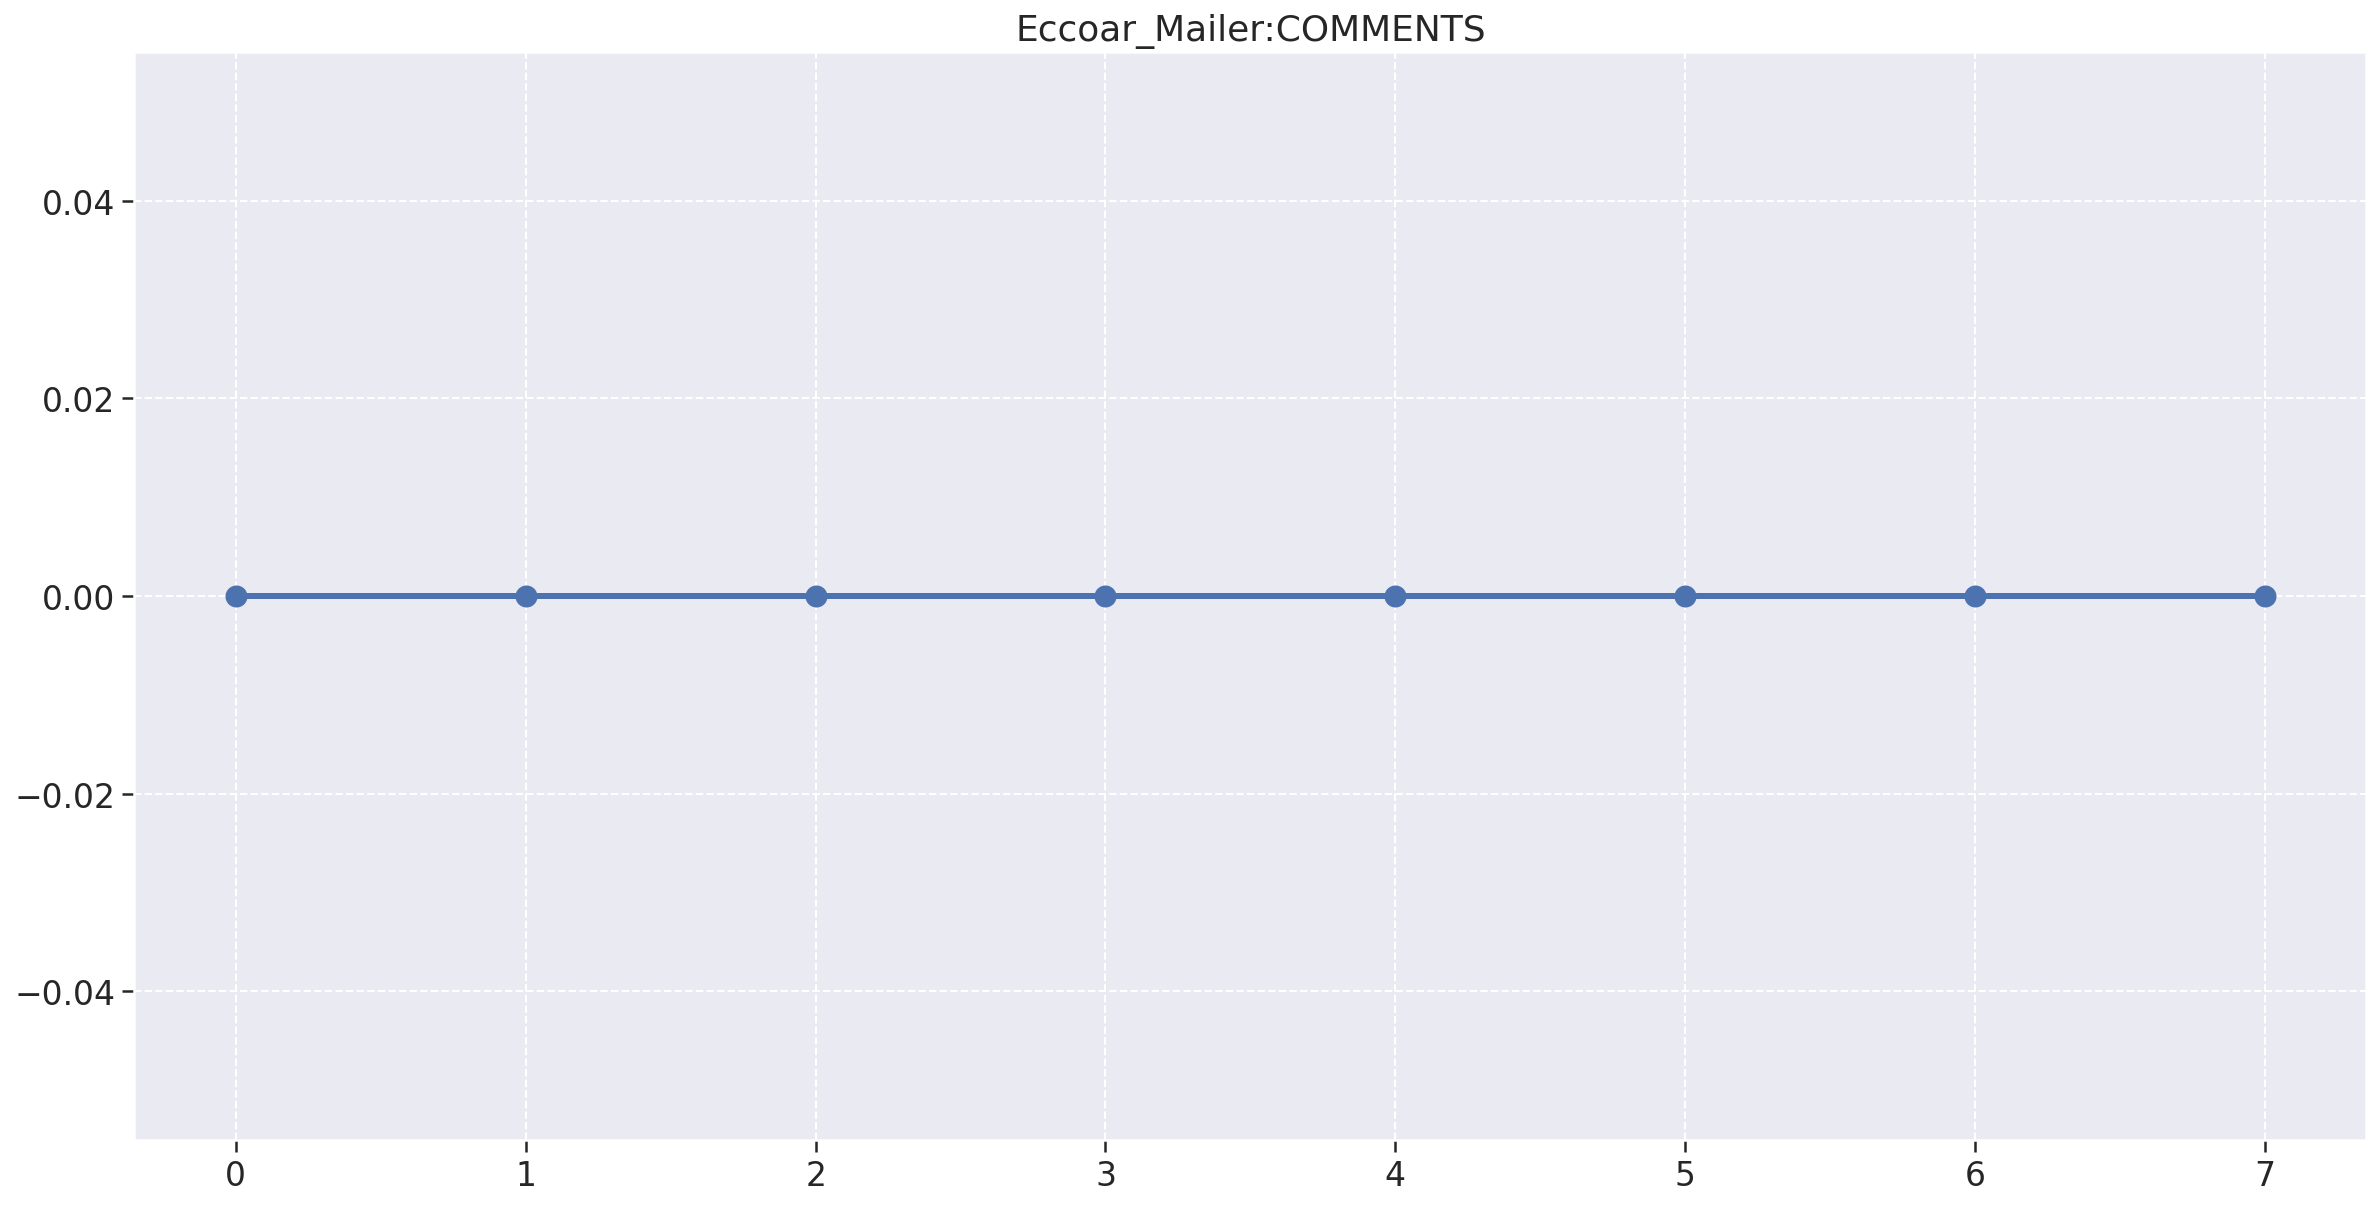

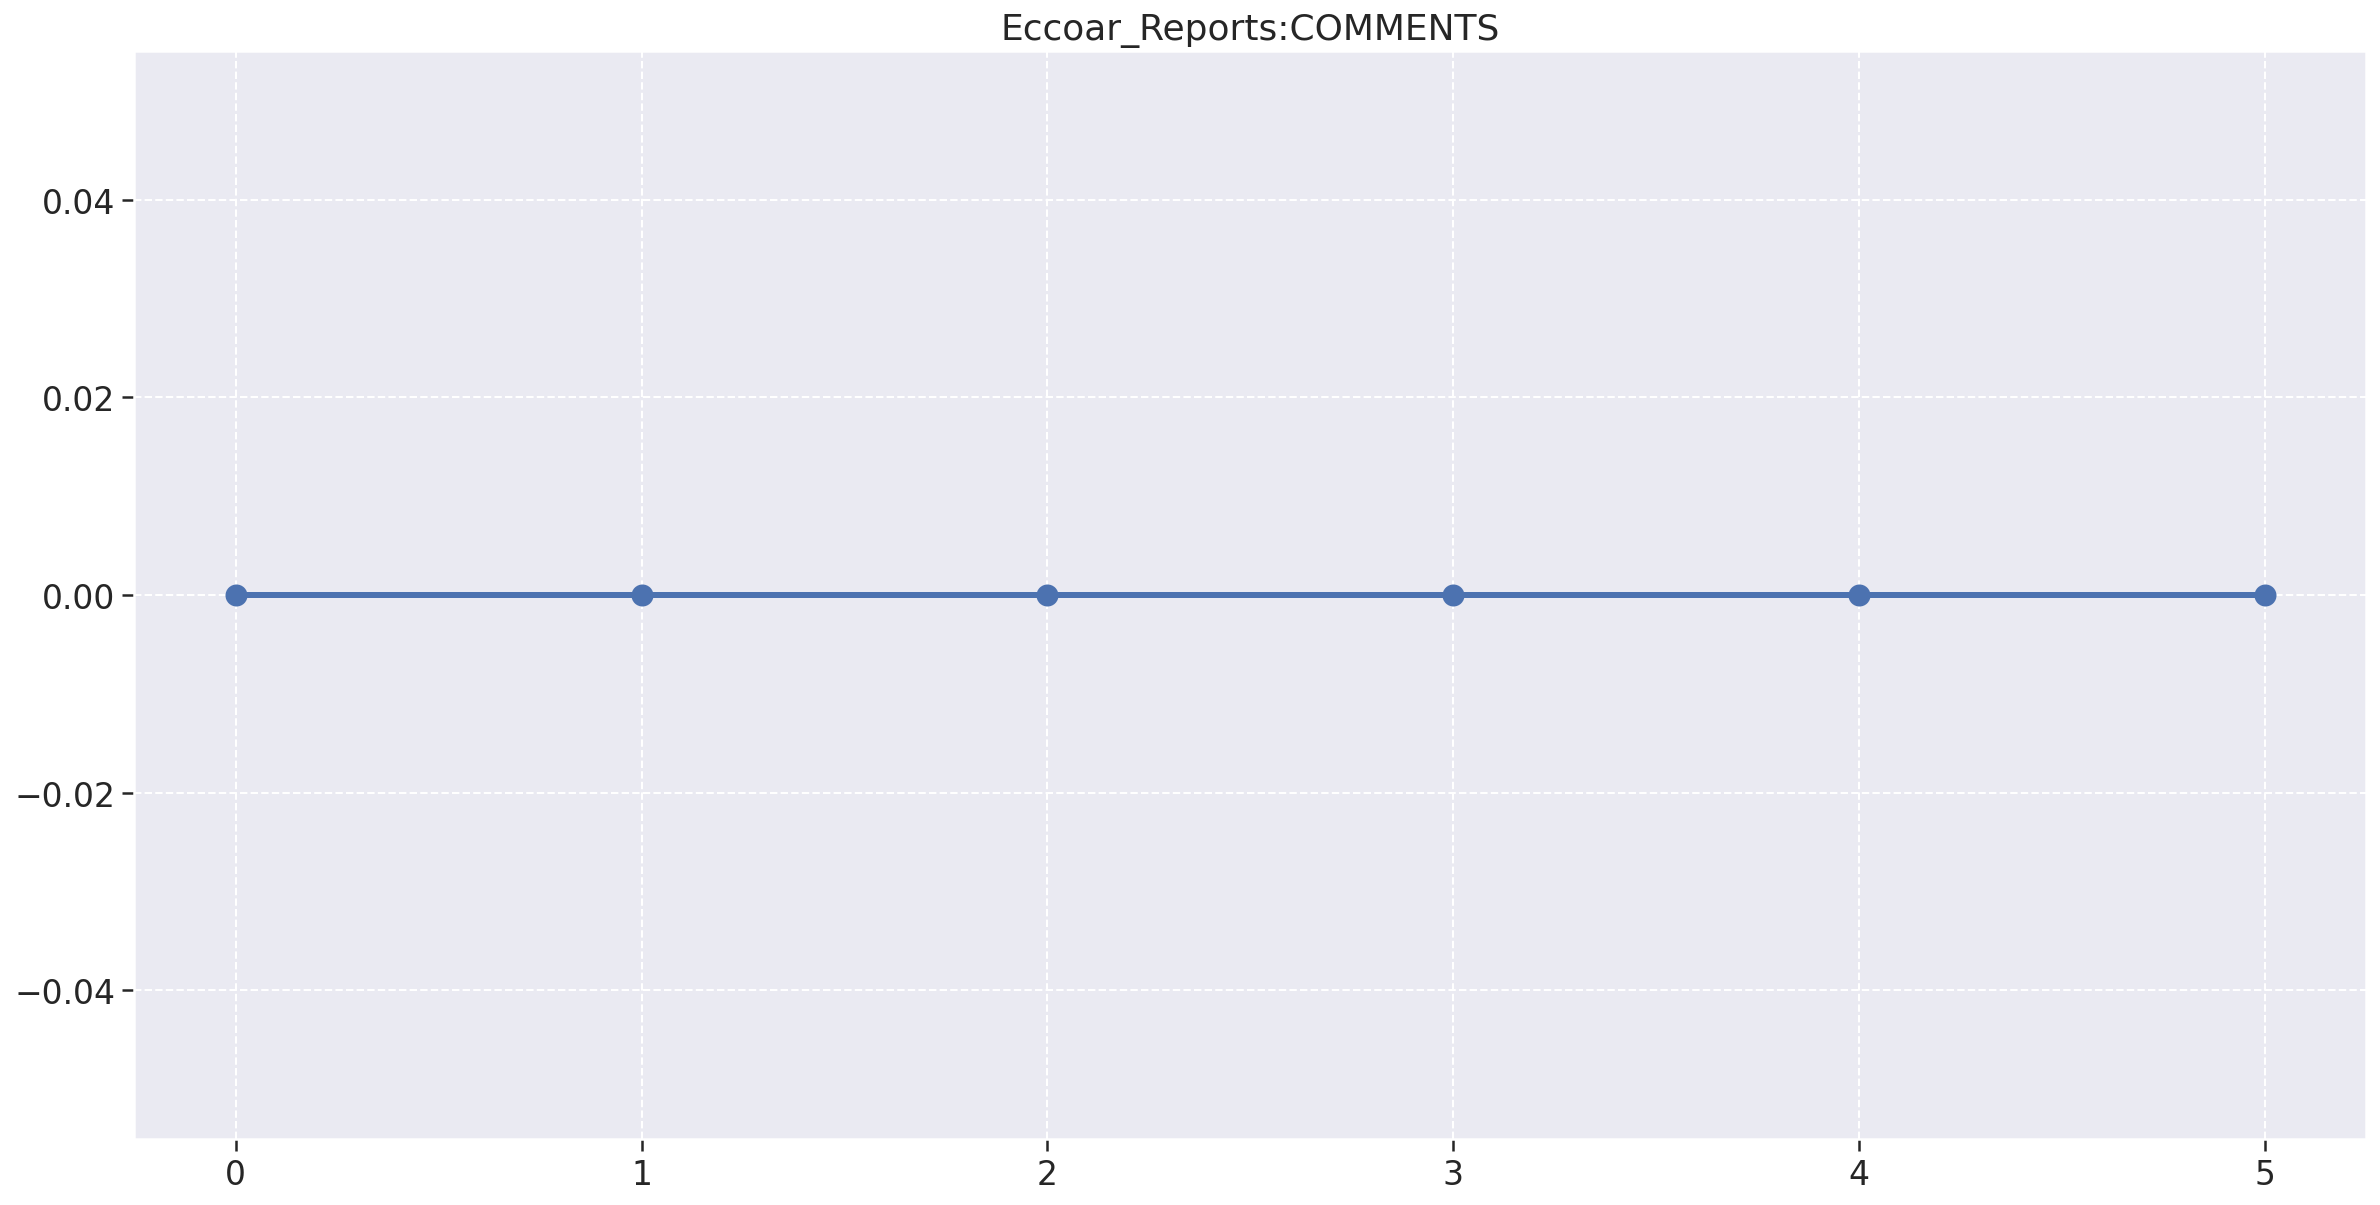

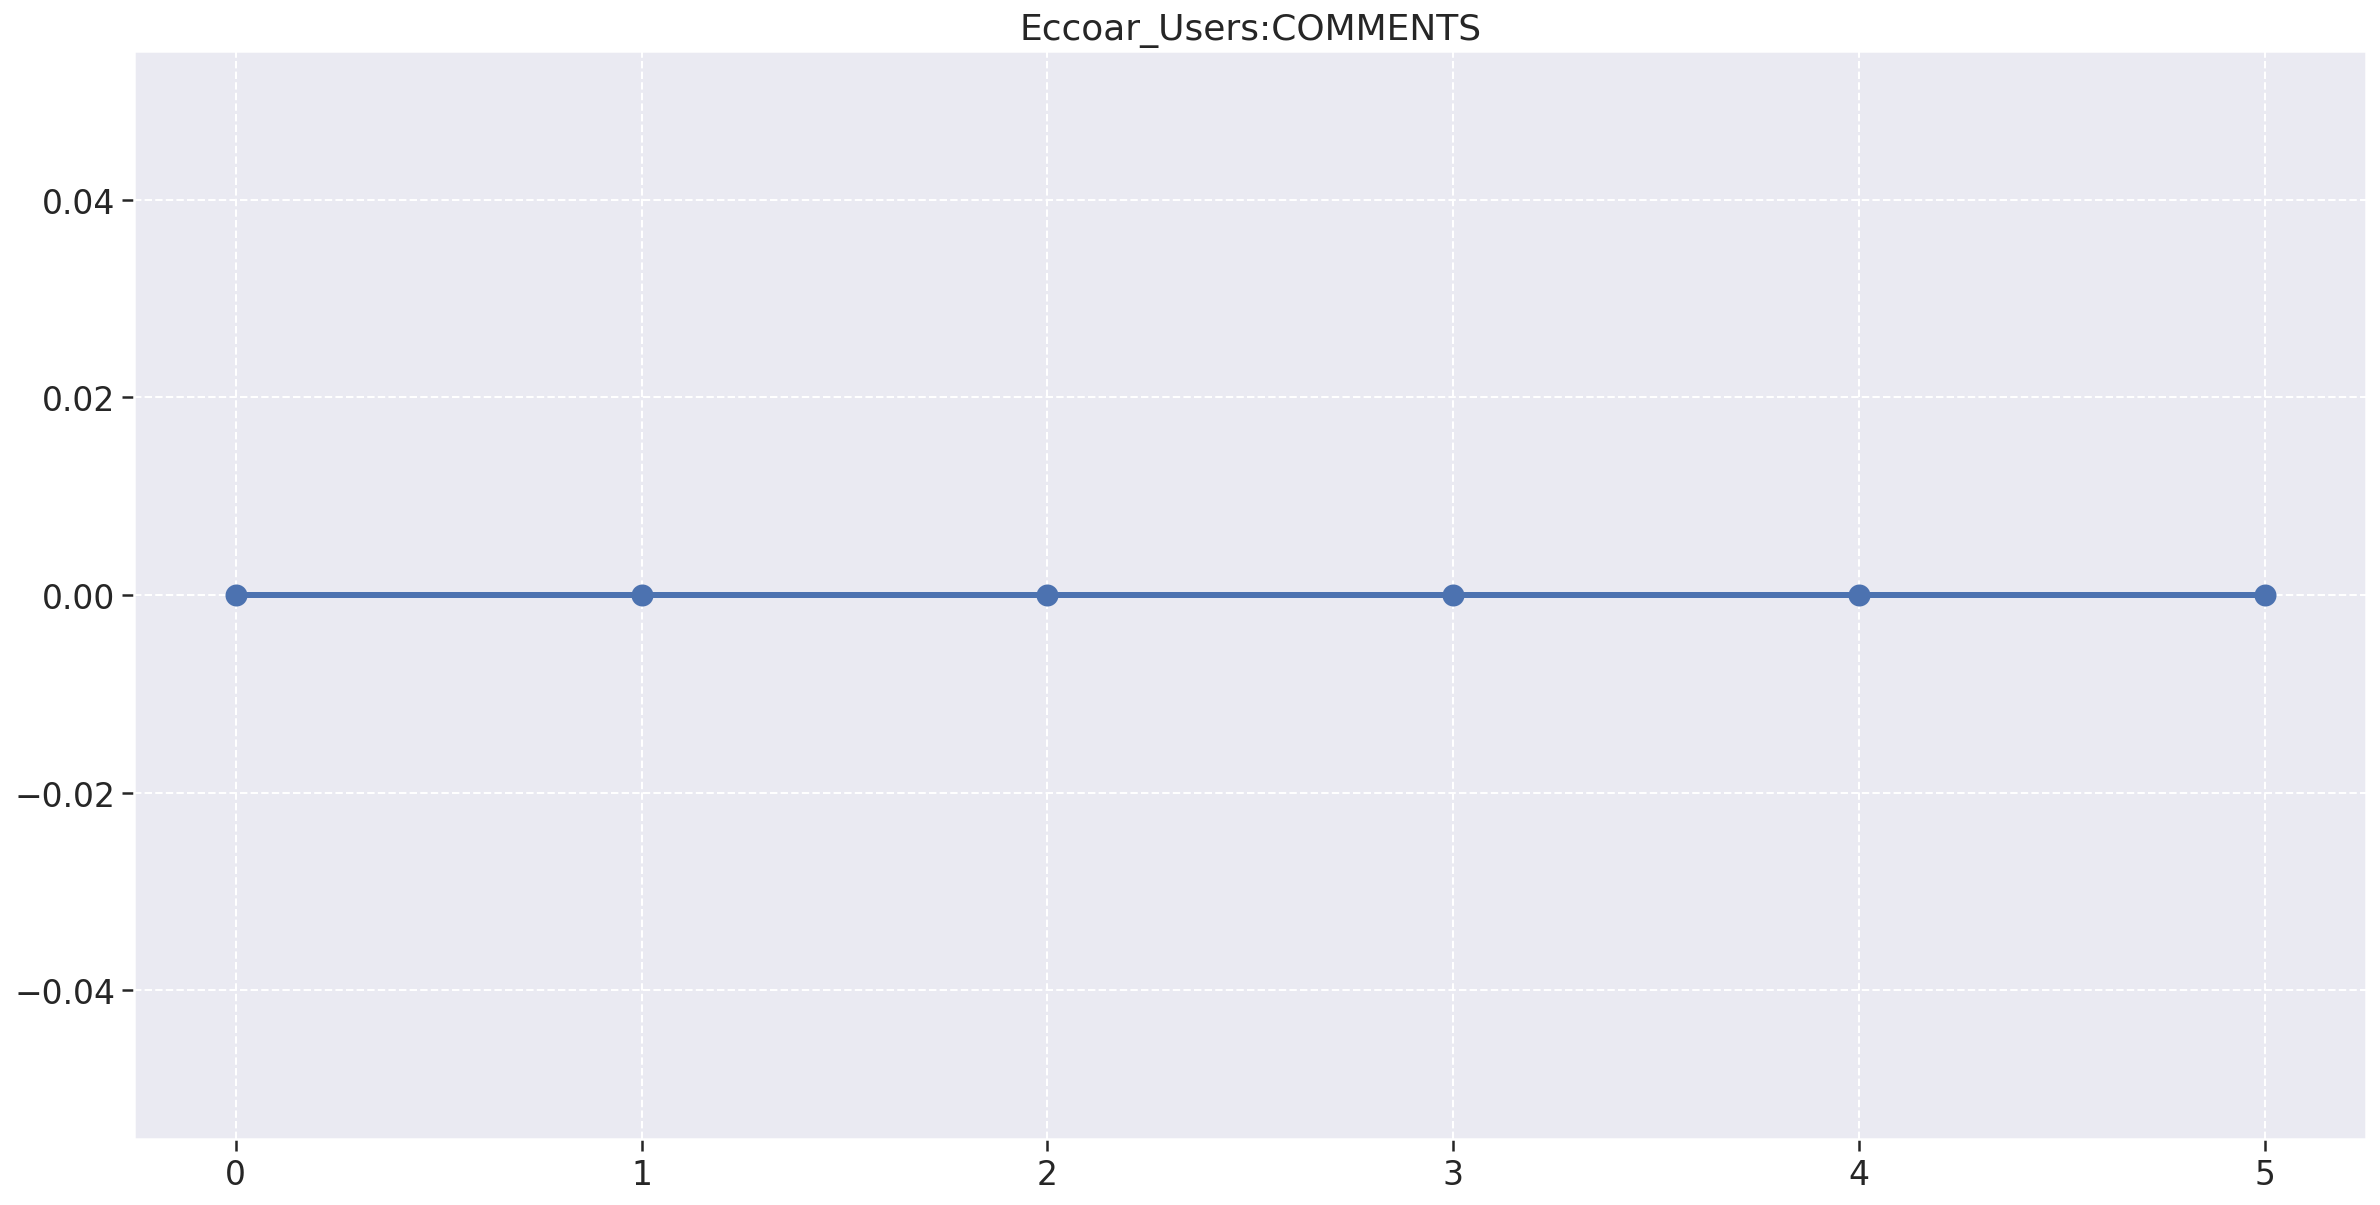

In [134]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)

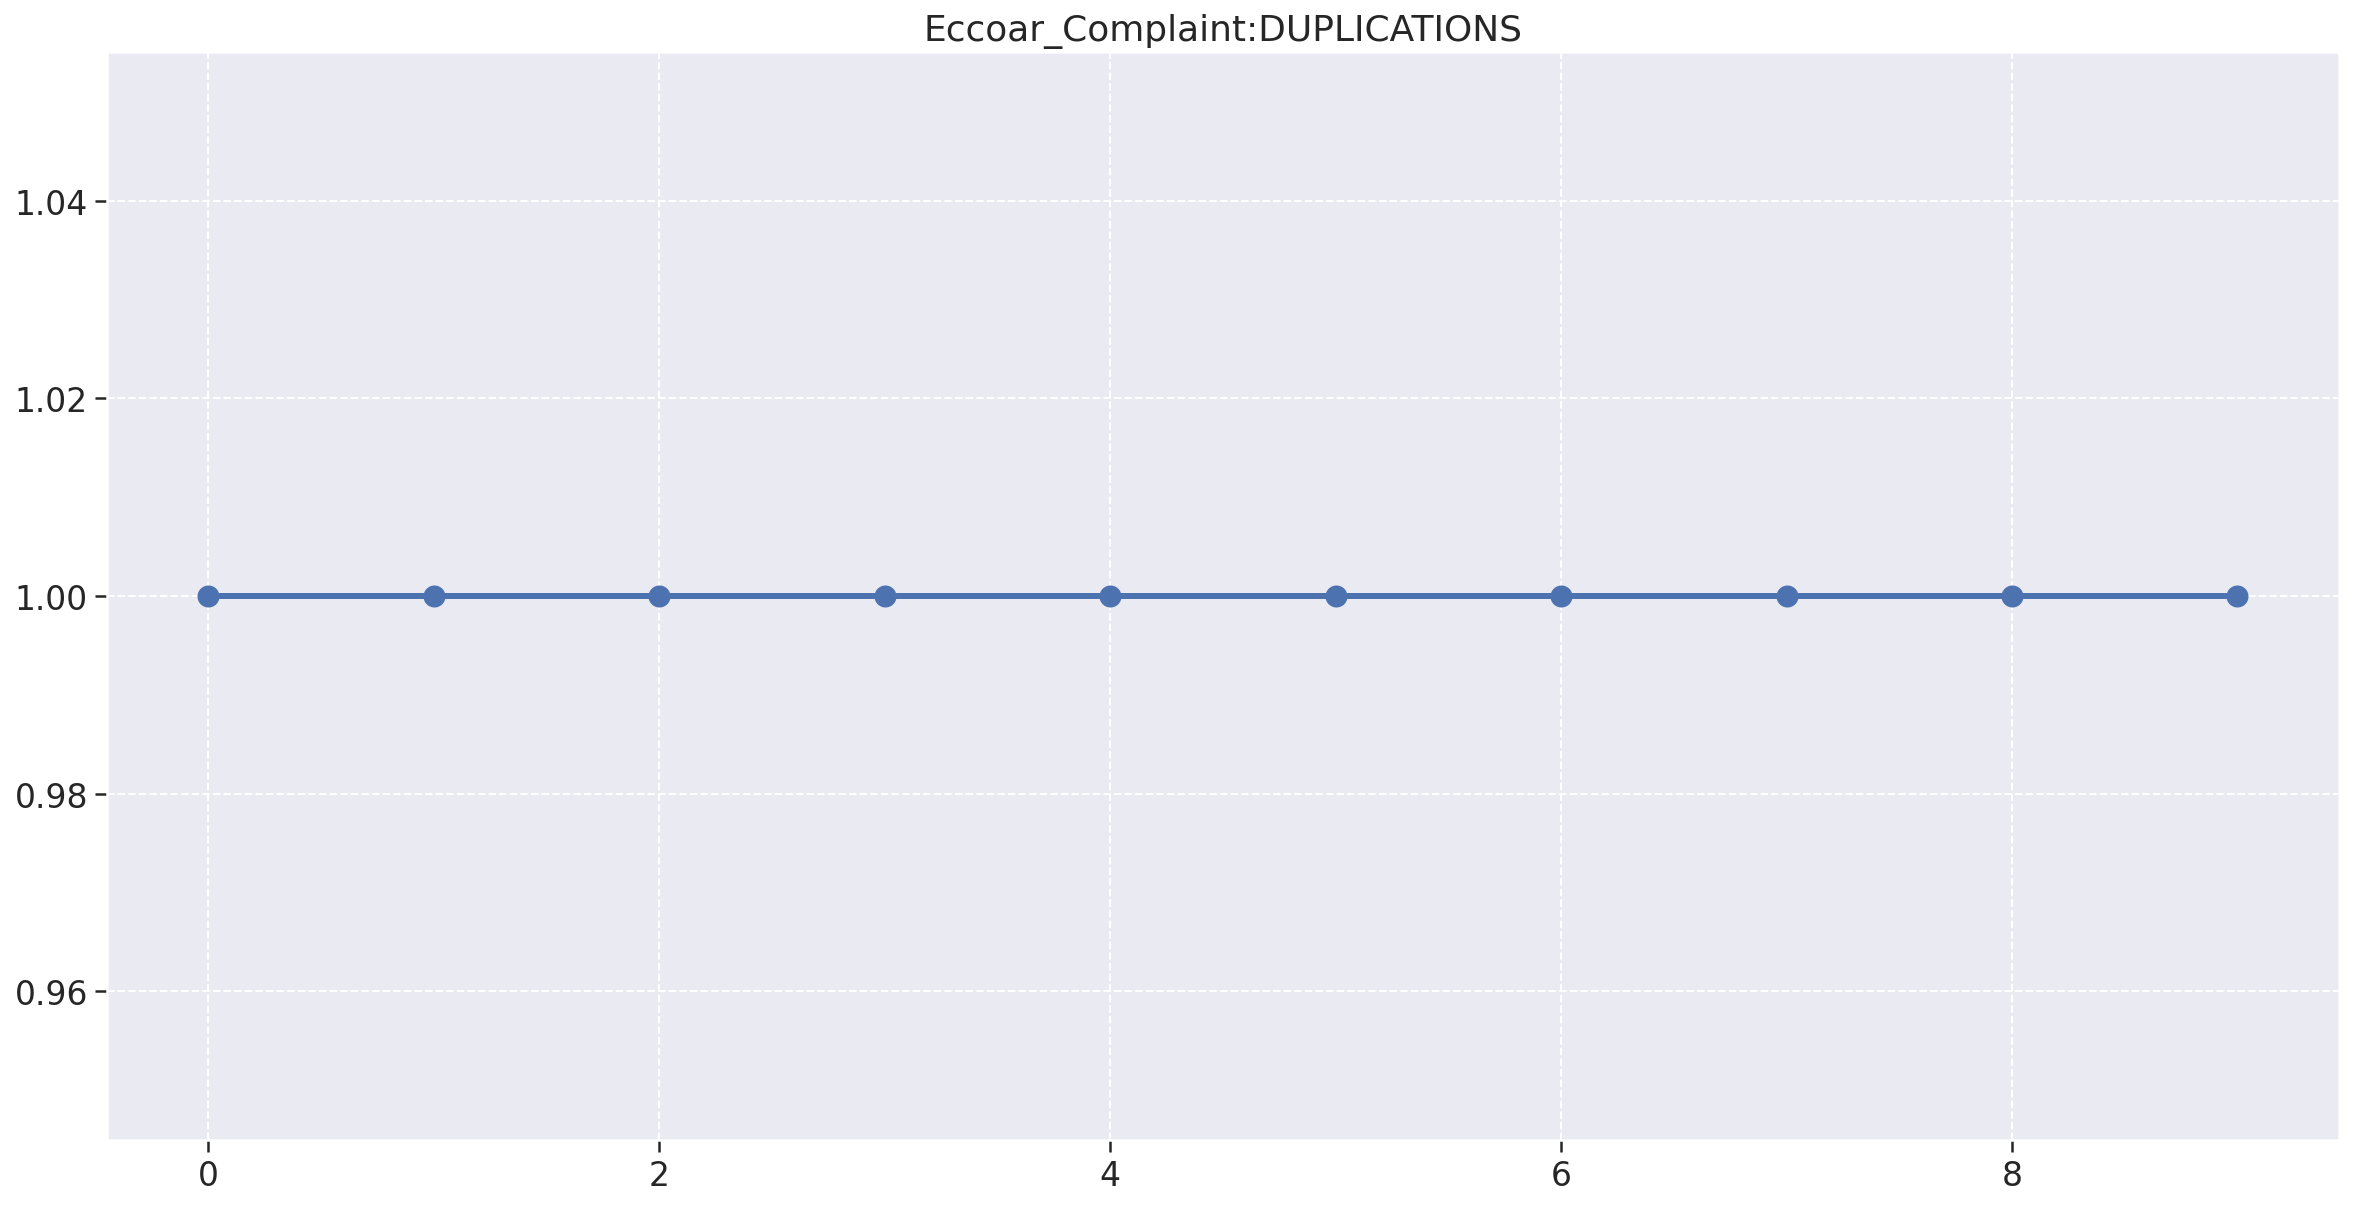

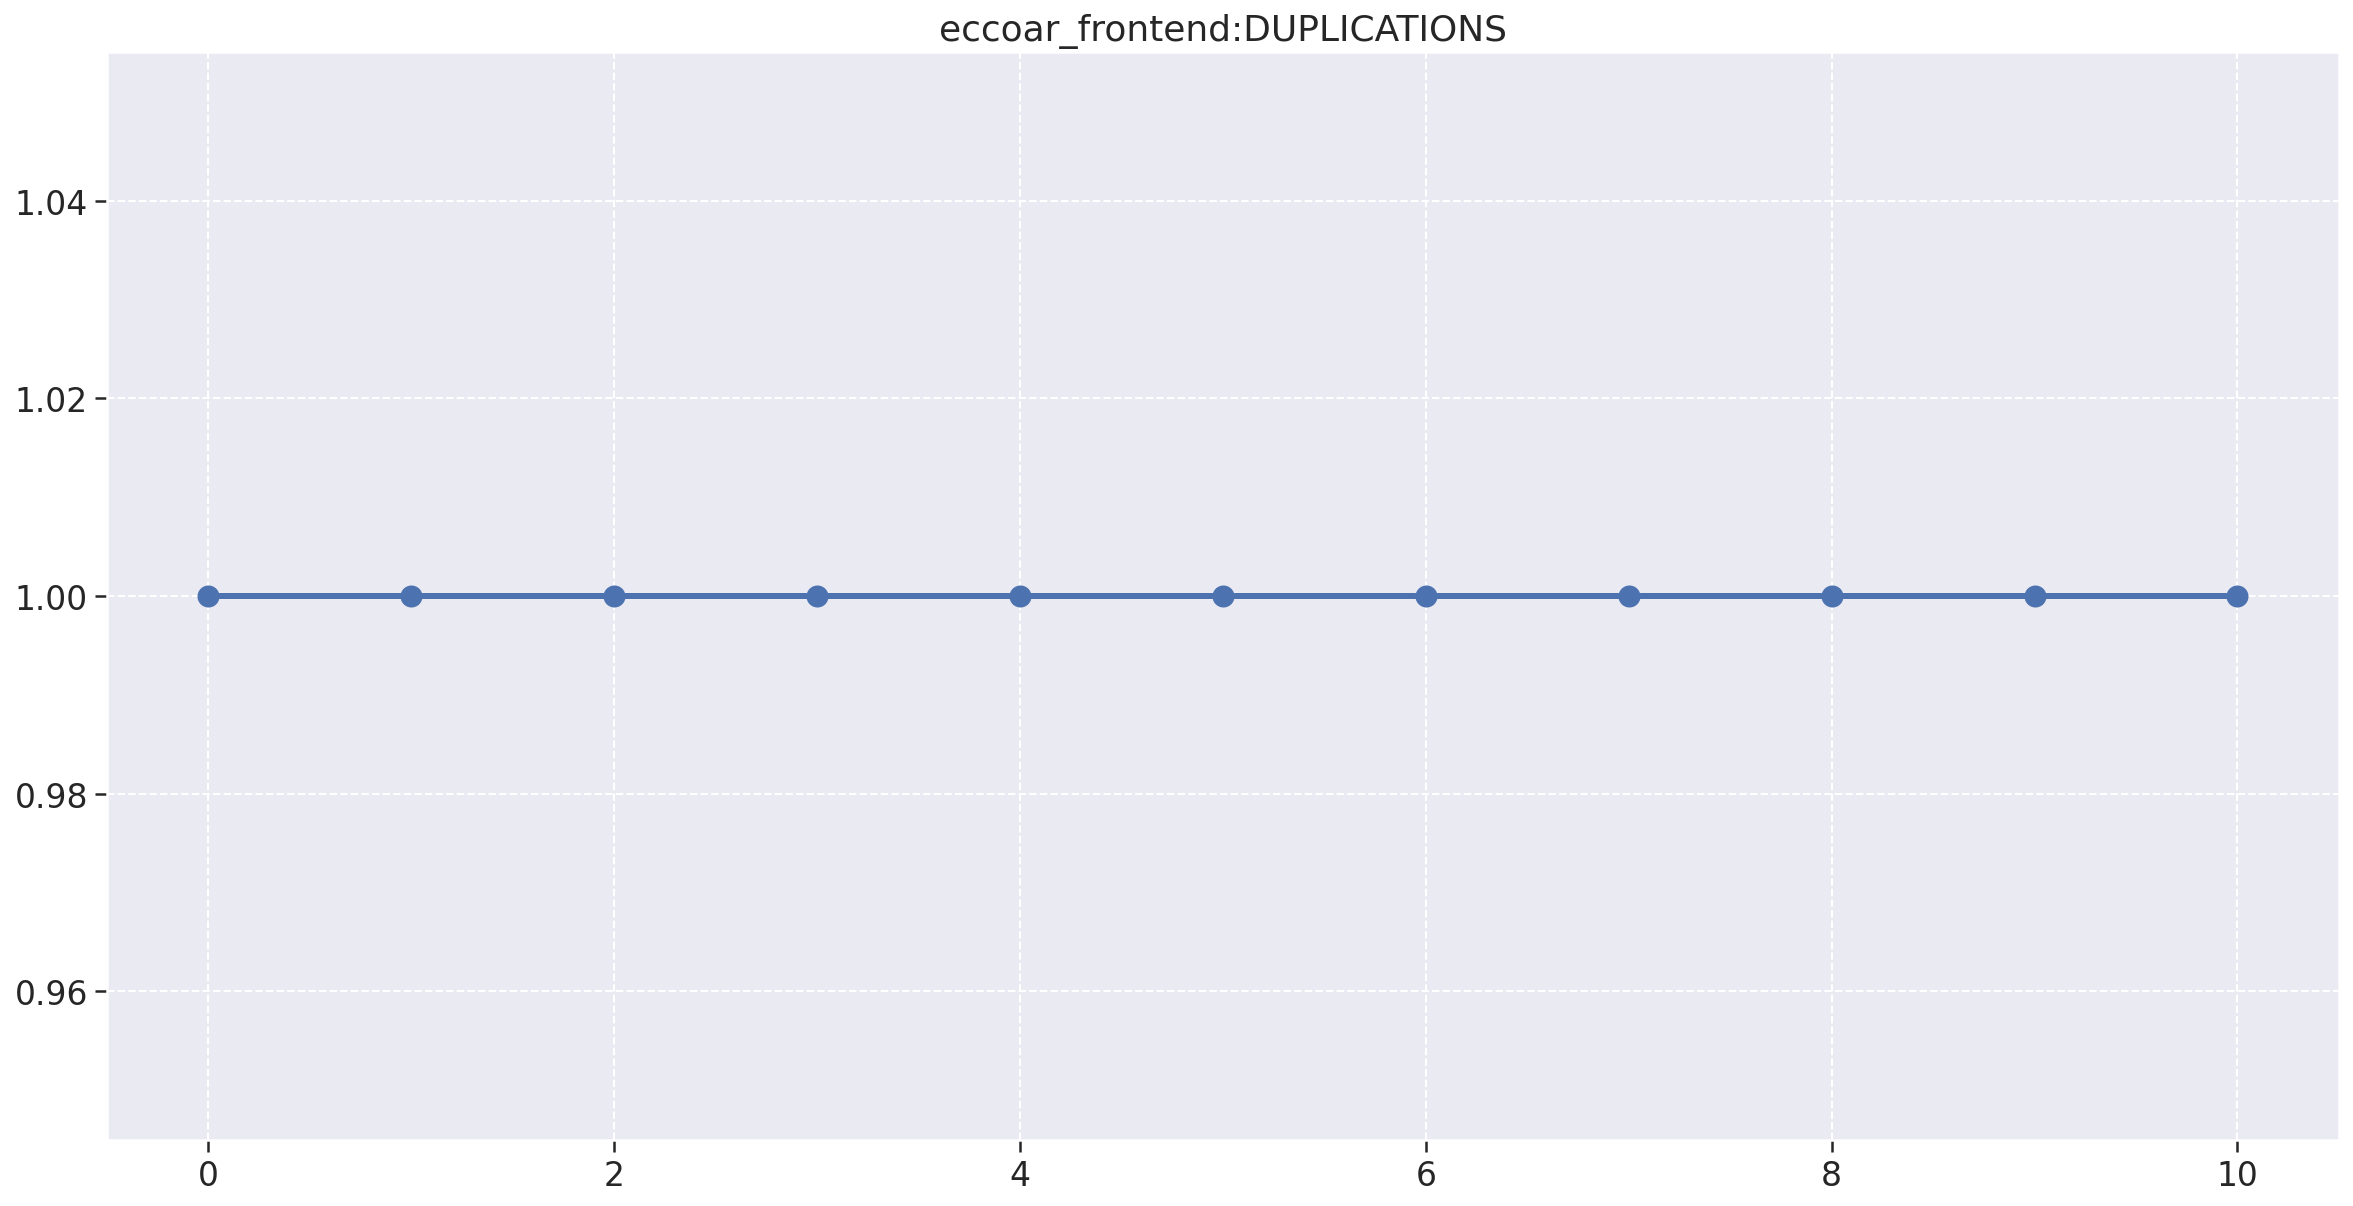

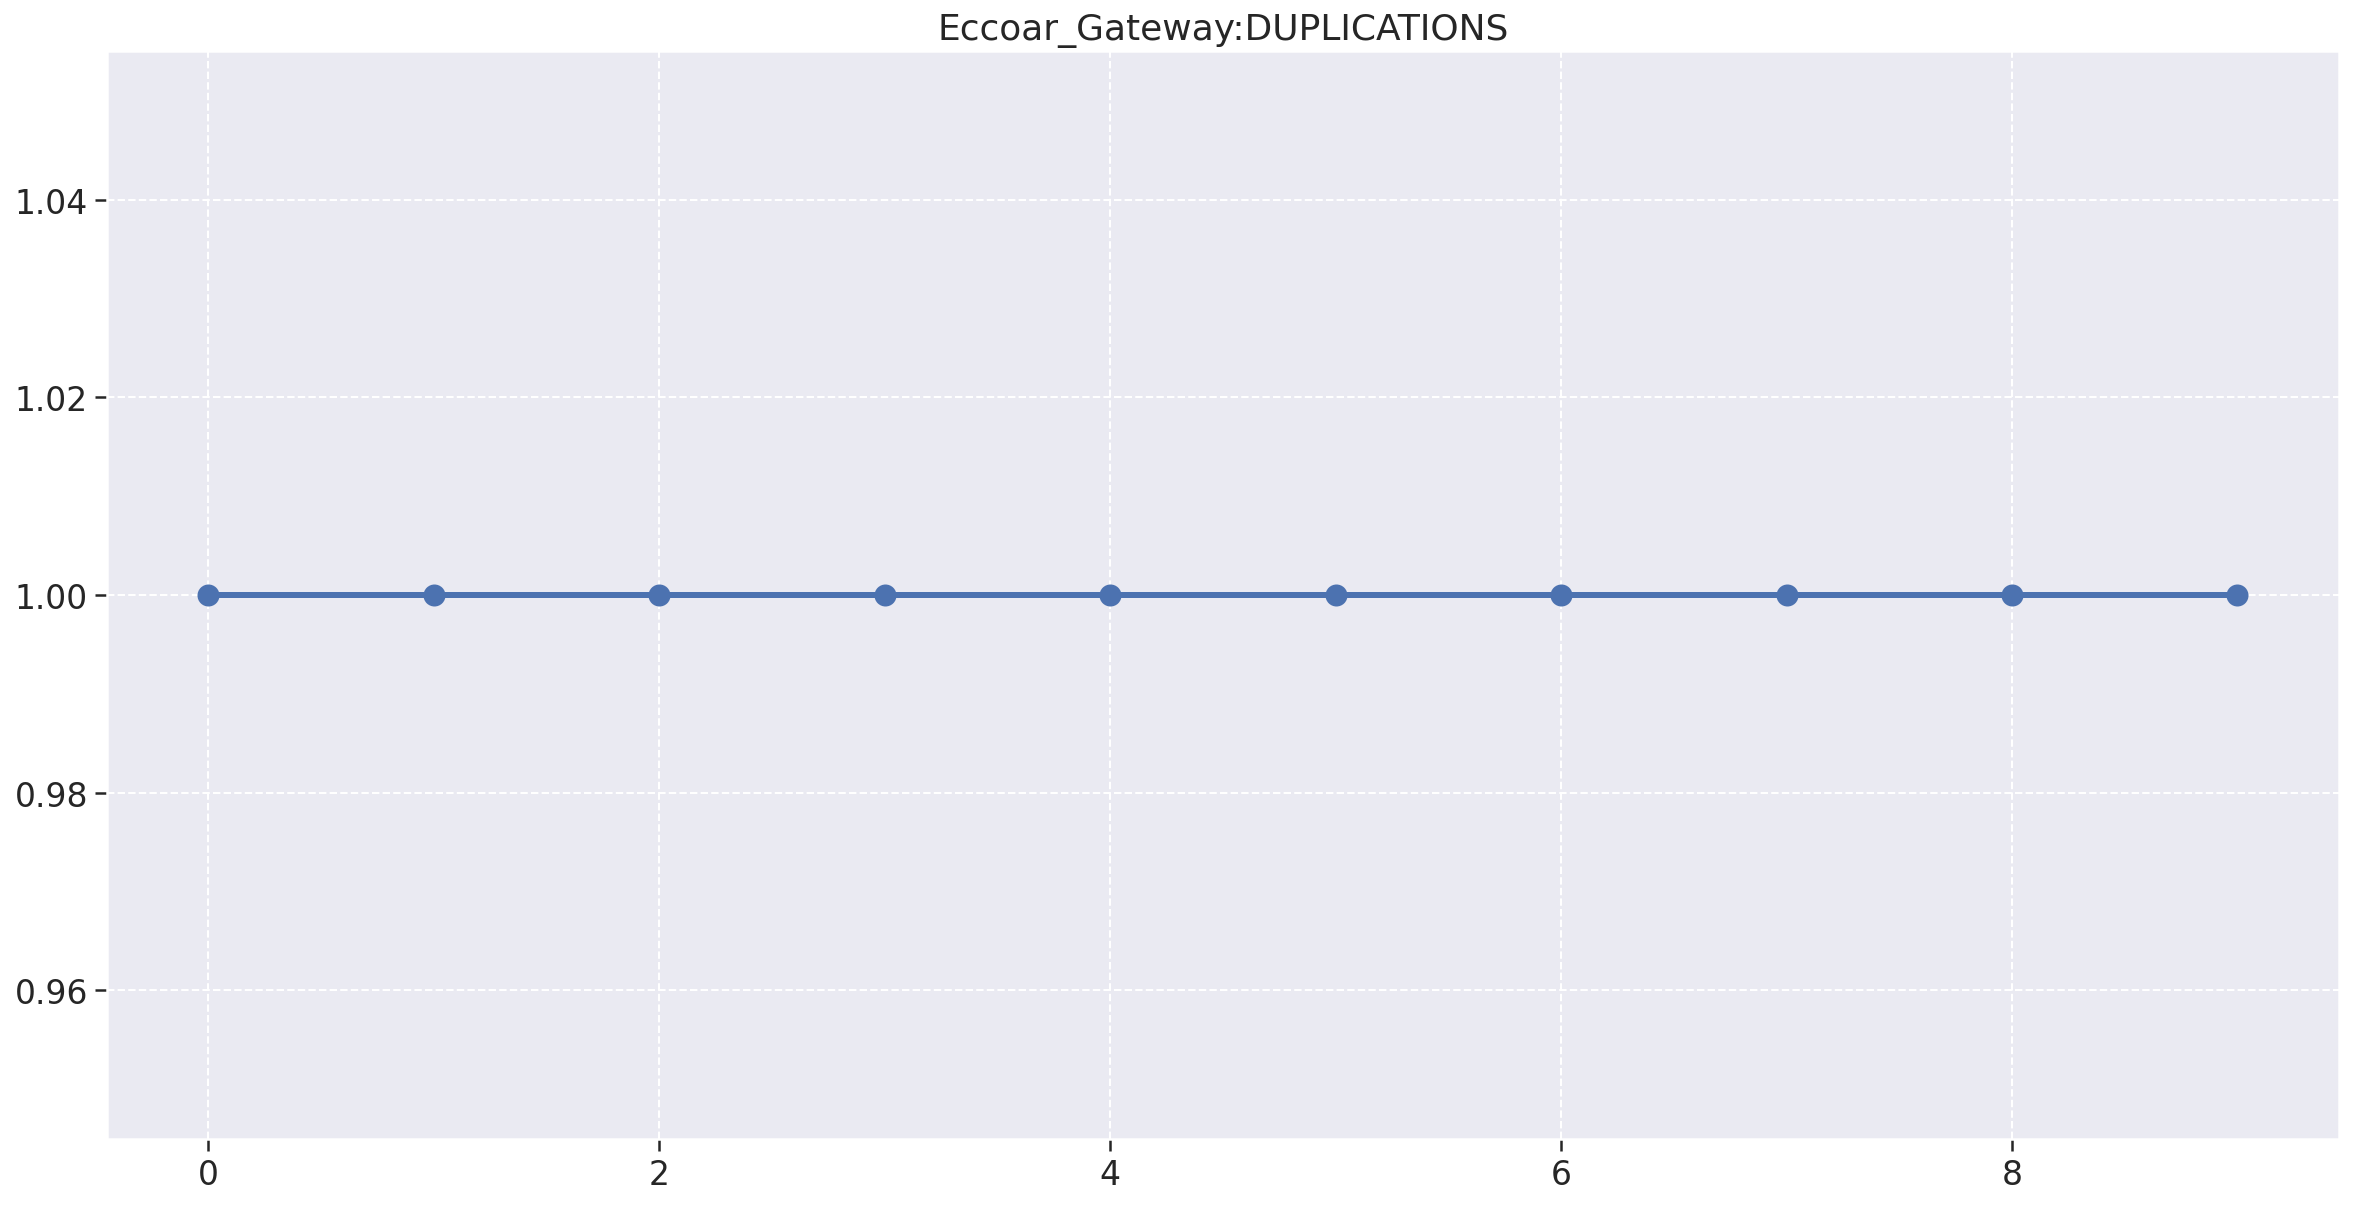

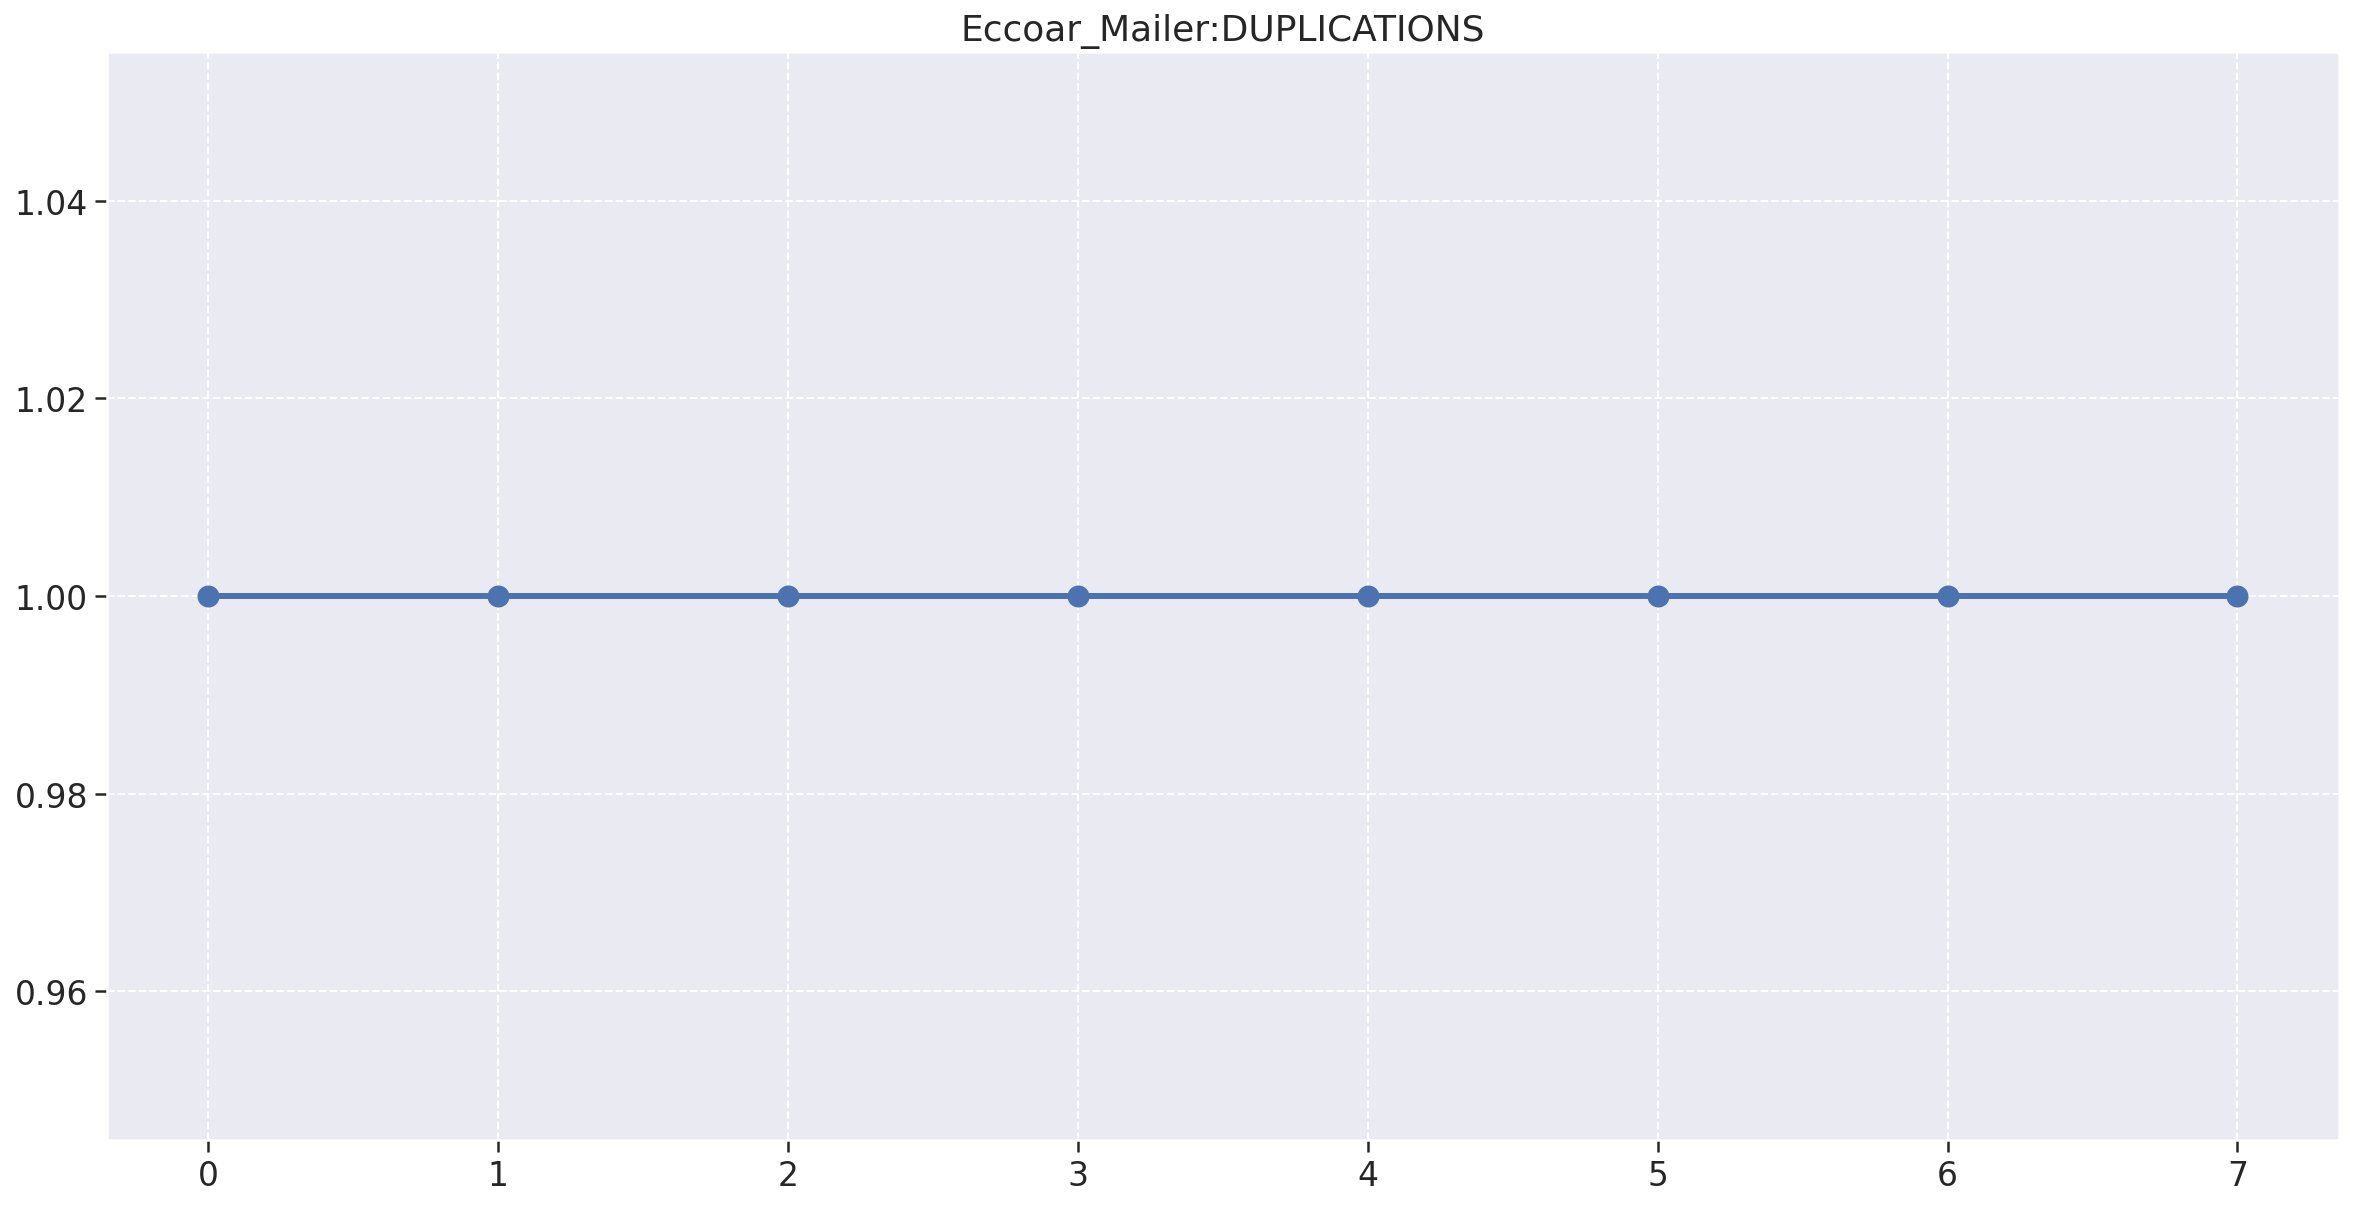

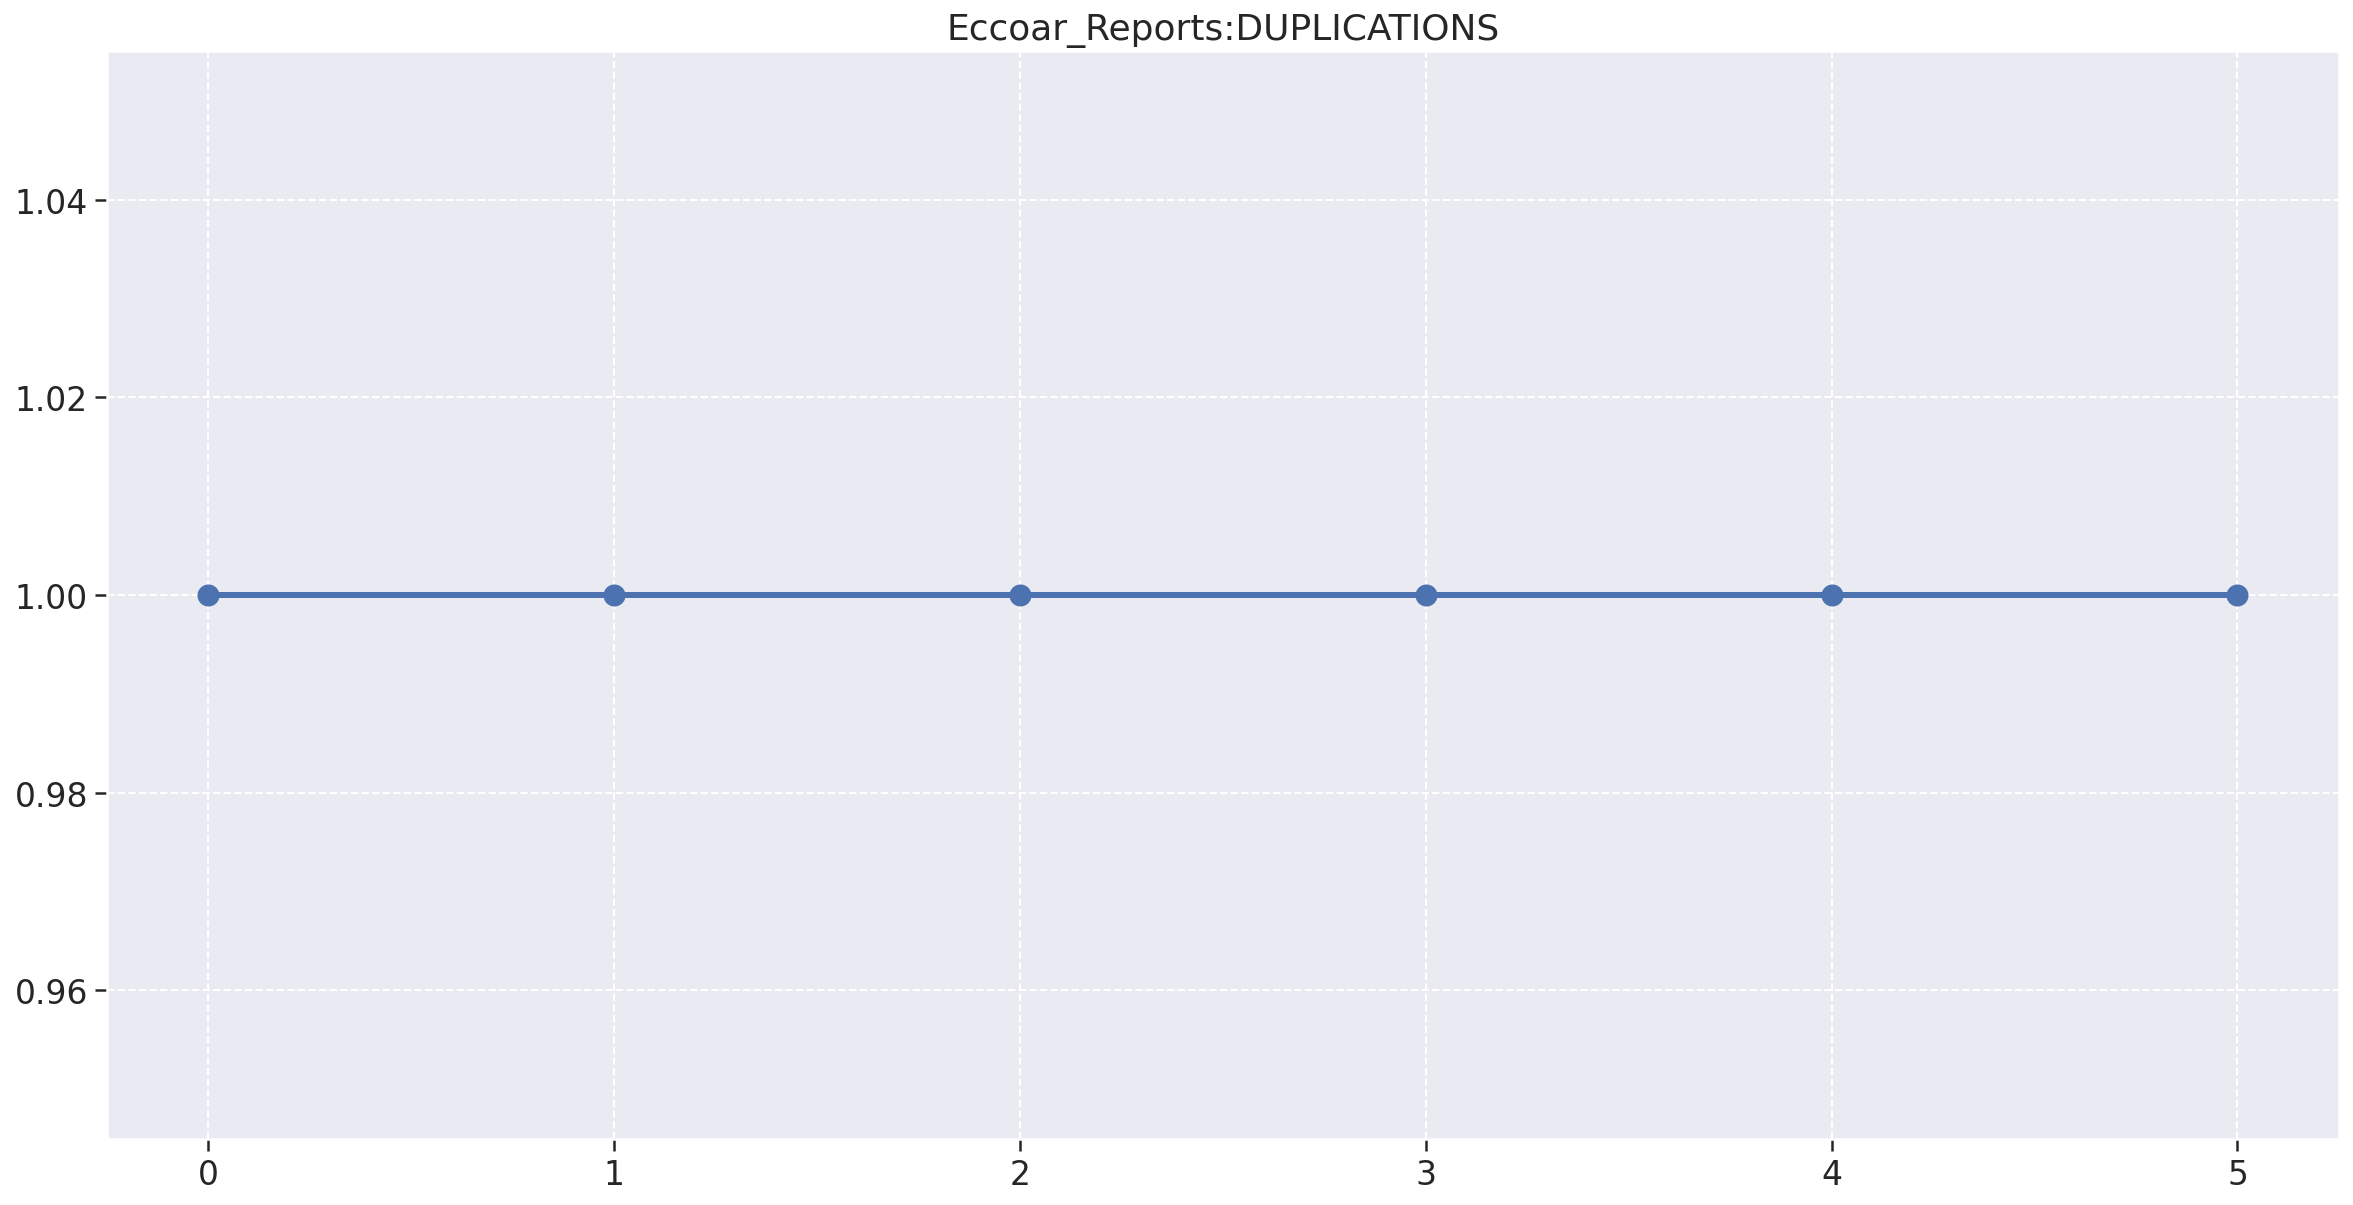

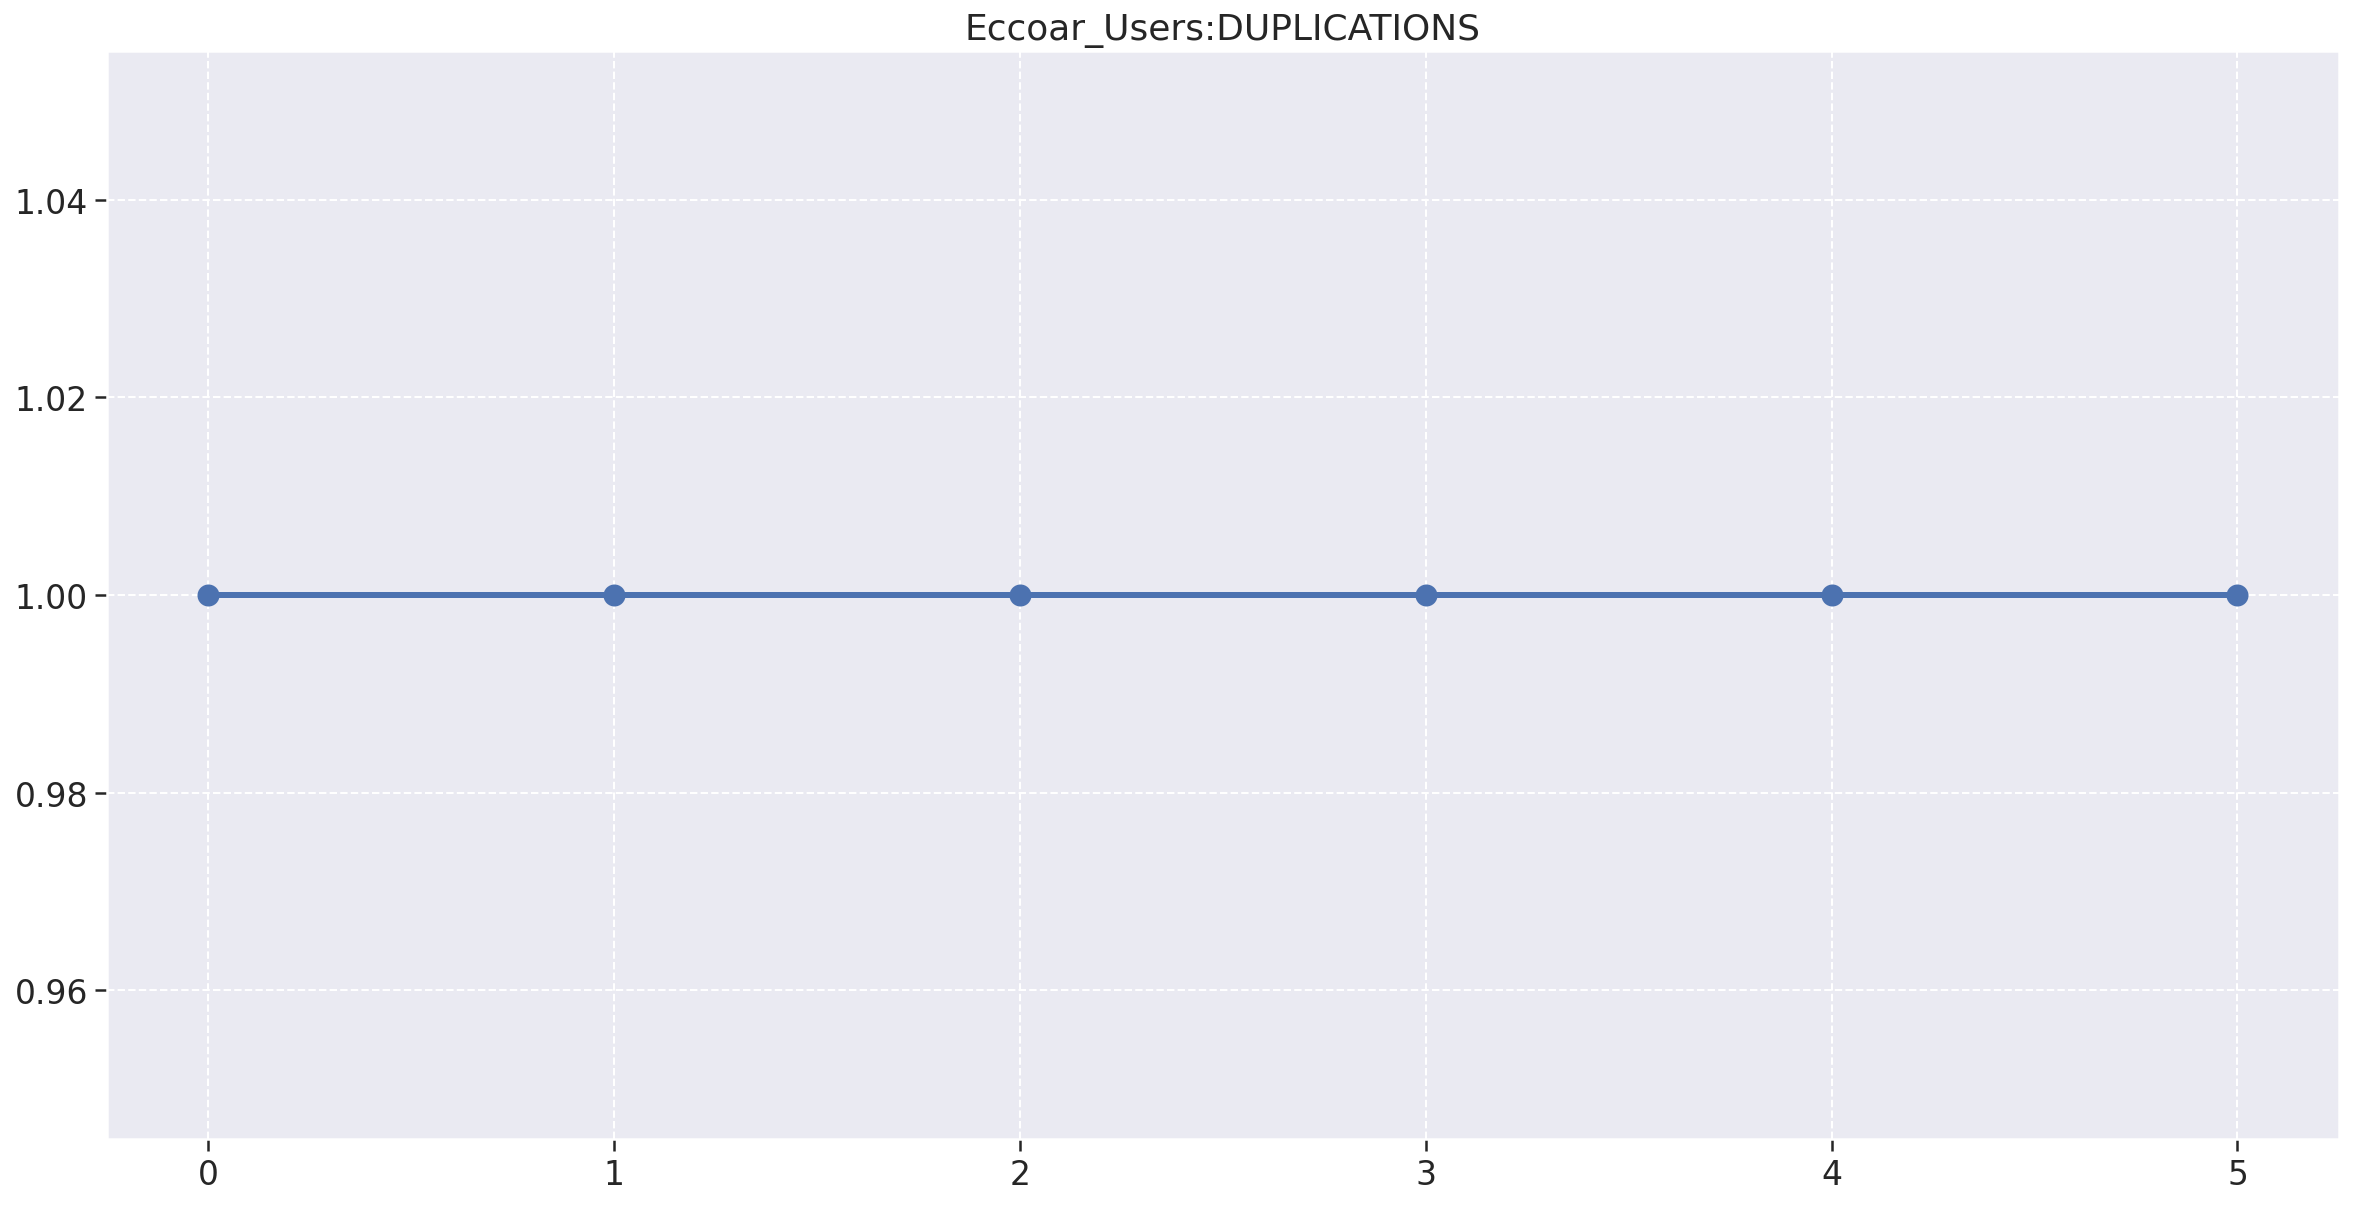

In [135]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [136]:
psc2 = 1
pm7 = 0.5
pm9 = 0.5

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc2'] = ((metrics_df['m7']*pm7)+(metrics_df['m9']*pm9))*psc2

KeyError: 'm7'

In [ ]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

In [ ]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:asc1")
    plt.plot(metrics_df['asc1'], linewidth=3, marker='o', markersize=10)

In [ ]:
#fig = plt.figure(figsize=(20, 10))

#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=10)

In [ ]:
#fig = plt.figure(figsize=(20, 10))


#plt.plot(repo1['asc1'], linewidth=3, marker='o', markersize=5)
#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=5)
...

In [ ]:
#metrics_df = pd.concat([repo1_metrics, repo2_metrics, ...], ignore_index=True)

#metrics_df['ac1'] = metrics_df['asc1'] * 1
#metrics_df['total'] = metrics_df['asc1'] * 1

# Histogram Repositories Analysis

In [ ]:
def generate_histogram(metric, metric_name, color):
    for repository, metrics_df in repository_metrics.items():
        fig = plt.figure(figsize=(30, 10))
        plt.title(f"{repository}:{metric_name}")
        plt.bar(metrics_df['version'], metrics_df[metric], color=color)
        plt.show()

In [ ]:
generate_histogram('m1', 'COMPLEXITY', 'g')

In [ ]:
generate_histogram('m2', 'COMMENTS', 'b')

In [ ]:
generate_histogram('m3', 'DUPLICATIONS', 'red')

In [ ]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac2'] = all_metrics_df['asc2'] * 1
all_metrics_df['totalAC2'] = all_metrics_df['asc2'] * 1

In [ ]:
corrMatrix = pd.DataFrame()
corrMatrix = all_metrics_df.corr()

In [ ]:
corrMatrix

# DataFrame M1, M2, M3


In [ ]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

In [ ]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac1'] = all_metrics_df['asc1'] * 1
all_metrics_df['totalAC1'] = all_metrics_df['asc1'] * 1

In [ ]:
all_metrics_df

In [ ]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

# DataFrame M7, M9